# Sign Language Classifier

## Author: Seung Hun Han
## Date: May 19th 2022


Description:

Classify images that expresses number between 0 to 10 in sign language.

Ex)
Image:
<img src="C:/Users/icako/user_data/train/001.png">

Label:

0

Data Source: https://dacon.io/competitions/official/235896/overview/description

In [1]:
import os # Import modules
import torch
import pandas as pd
import numpy as np
from glob import glob
import torchvision.transforms as transforms 
from torch.utils.data import DataLoader
from torch.utils.data import DataLoader, Dataset
import random
from tqdm import tqdm

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# use GPU for compuation if available

In [97]:
import random
def seed_everything(seed):  # To ensure reproducibility, set seed for entire process.
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

CFG = {
    'IMG_SIZE':128, #Image Size
    'EPOCHS':25, #Epochs
    'LEARNING_RATE':2e-2, #Learning Rate
    'BATCH_SIZE':12,
    'SEED':41,
}
seed_everything(CFG['SEED'])

In [5]:
label=pd.read_csv('./user_data/train.csv')['label'] # Load Label data

In [6]:
label[label=='10-1']=10  # Sign language that represents "number ten" is lablled as 10-1. 
label[label=='10-2']=0 # Sign language that represents "number zero" is lablled as 10-2. 
label=label.apply(lambda x: int(x)) # Convert label data to integer data

In [8]:
image_path=[]

In [9]:
data_dir='./user_data/'

def data_import(directory,train=True): # Function that loads all directory of train and test image
    image_path=[]
    label_list=[]
    if train==True:
        image_path.append(glob(os.path.join(data_dir,'train/*.png')))
        label_list.extend(label)
        return image_path, label
    else:
        image_path.append(glob(os.path.join(data_dir,'test/*.png')))
        return image_path

In [10]:
train_img_path, train_label=data_import(data_dir,train=True) # Load train image directory and train label

In [11]:
test_img_path=data_import(data_dir,train=False) # Load test image directory and test label

## Data Augmentation

Vision deep learning dataset usually requires enormous sample size to prevent overfitting.
Our train dataset, size smaller than 1000, is simply not large enought to produce a decent model.
One way to resolve such issue is 'data augmentation'

Data augmention is simply creating several additional images from an image.

Proceess like Crop, Rotation, Mirroring creates set of images are structually different from an original image, yet still adequate for model training.

Ex)
<img src="C:/Users/icako/user_data/train/002.png">
<img src="C:/Users/icako/user_data/train/002.pngnoiseAdded_1387.png">
<img src="C:/Users/icako/user_data/train/002.pngrotated_803.png">

Ideally, at least ten thousand train data would be required for quality result. For now, I will only triple the original train data.

In [13]:
import cv2

In [14]:
from PIL import Image

total_origin_image_num = len(train_img_path[0])
augment_cnt = 1

for i in tqdm(range(1, 2000)):
    
    change_picture_index = random.randrange(1, total_origin_image_num-1) # Randomly choose an image
    print(change_picture_index)

    origin_image_path = train_img_path[0][change_picture_index]
    print(origin_image_path)
    image = Image.open(origin_image_path)
    random_augment = random.randrange(1,4) # Randomly choose a augmentation process to be implemented.
    
    if(random_augment == 1):
        #Mirroring Image
        print("invert")
        inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
        inverted_image.save(origin_image_path + 'inverted_' + str(augment_cnt) + '.png')
        
    elif(random_augment == 2):
        #Rotate Image
        print("rotate")
        rotated_image = image.rotate(random.randrange(-90, 90))
        rotated_image.save(origin_image_path + 'rotated_' + str(augment_cnt) + '.png')
        
    elif(random_augment == 3):
        #Adding Noise
        img = cv2.imread(origin_image_path)
        print("noise")
        row,col,ch= img.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy_array = img + gauss
        noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
        noisy_image.save(origin_image_path + 'noiseAdded_' + str(augment_cnt) + '.png')
    
    augment_cnt += 1

  0%|          | 6/1999 [00:00<00:35, 55.61it/s]

391
./user_data/train\392.png
rotate
171
./user_data/train\172.png
rotate
707
./user_data/train\708.png
rotate
284
./user_data/train\285.png
rotate
10
./user_data/train\011.png
invert
678
./user_data/train\679.png
invert
450
./user_data/train\451.png
invert
154
./user_data/train\155.png
noise
327
./user_data/train\328.png
invert
264
./user_data/train\265.png
noise
708
./user_data/train\709.png


  1%|          | 18/1999 [00:00<00:36, 53.65it/s]

noise
598
./user_data/train\599.png
invert
123
./user_data/train\124.png
noise
34
./user_data/train\035.png
rotate
753
./user_data/train\754.png
invert
75
./user_data/train\076.png
noise
369
./user_data/train\370.png
noise
487
./user_data/train\488.png
invert
569
./user_data/train\570.png
noise
19
./user_data/train\020.png
invert
102
./user_data/train\103.png
invert
706
./user_data/train\707.png


  2%|▏         | 32/1999 [00:00<00:32, 60.42it/s]

invert
55
./user_data/train\056.png
rotate
231
./user_data/train\232.png
noise
27
./user_data/train\028.png
noise
592
./user_data/train\593.png
invert
446
./user_data/train\447.png
invert
309
./user_data/train\310.png
rotate
110
./user_data/train\111.png
noise
96
./user_data/train\097.png
rotate
680
./user_data/train\681.png
noise
506
./user_data/train\507.png
rotate
23
./user_data/train\024.png
invert
139
./user_data/train\140.png


  2%|▏         | 39/1999 [00:00<00:31, 61.35it/s]

invert
470
./user_data/train\471.png
noise
412
./user_data/train\413.png
rotate
763
./user_data/train\764.png
rotate
29
./user_data/train\030.png
invert
671
./user_data/train\672.png
rotate
181
./user_data/train\182.png
invert
827
./user_data/train\828.png
invert
734
./user_data/train\735.png
invert
738
./user_data/train\739.png
noise
770
./user_data/train\771.png
invert
677
./user_data/train\678.png
noise
131
./user_data/train\132.png


  3%|▎         | 53/1999 [00:00<00:31, 61.33it/s]

rotate
624
./user_data/train\625.png
noise
429
./user_data/train\430.png
noise
102
./user_data/train\103.png
invert
226
./user_data/train\227.png
rotate
752
./user_data/train\753.png
rotate
808
./user_data/train\809.png
rotate
685
./user_data/train\686.png
rotate
217
./user_data/train\218.png
noise
255
./user_data/train\256.png
rotate
721
./user_data/train\722.png
rotate
389
./user_data/train\390.png
rotate
750
./user_data/train\751.png


  3%|▎         | 67/1999 [00:01<00:30, 63.10it/s]

invert
220
./user_data/train\221.png
noise
169
./user_data/train\170.png
invert
32
./user_data/train\033.png
invert
185
./user_data/train\186.png
rotate
66
./user_data/train\067.png
invert
561
./user_data/train\562.png
noise
638
./user_data/train\639.png
invert
505
./user_data/train\506.png
rotate
234
./user_data/train\235.png
rotate
843
./user_data/train\844.png
rotate
758
./user_data/train\759.png
noise
198
./user_data/train\199.png


  4%|▎         | 74/1999 [00:01<00:31, 60.87it/s]

noise
793
./user_data/train\794.png
rotate
366
./user_data/train\367.png
rotate
31
./user_data/train\032.png
invert
604
./user_data/train\605.png
noise
158
./user_data/train\159.png
noise
157
./user_data/train\158.png
noise
531
./user_data/train\532.png
noise
182
./user_data/train\183.png
rotate
43
./user_data/train\044.png
noise
683
./user_data/train\684.png


  4%|▍         | 89/1999 [00:01<00:31, 60.63it/s]

noise
711
./user_data/train\712.png
rotate
699
./user_data/train\700.png
rotate
291
./user_data/train\292.png
invert
266
./user_data/train\267.png
rotate
237
./user_data/train\238.png
invert
724
./user_data/train\725.png
rotate
602
./user_data/train\603.png
rotate
413
./user_data/train\414.png
rotate
100
./user_data/train\101.png
noise
482
./user_data/train\483.png
noise
452
./user_data/train\453.png
invert
496
./user_data/train\497.png


  5%|▌         | 103/1999 [00:01<00:30, 61.60it/s]

invert
486
./user_data/train\487.png
rotate
253
./user_data/train\254.png
rotate
583
./user_data/train\584.png
rotate
626
./user_data/train\627.png
noise
837
./user_data/train\838.png
noise
548
./user_data/train\549.png
invert
776
./user_data/train\777.png
noise
201
./user_data/train\202.png
rotate
331
./user_data/train\332.png
rotate
177
./user_data/train\178.png
rotate
228
./user_data/train\229.png
invert


  6%|▌         | 110/1999 [00:01<00:31, 60.34it/s]

631
./user_data/train\632.png
noise
411
./user_data/train\412.png
invert
28
./user_data/train\029.png
noise
605
./user_data/train\606.png
noise
385
./user_data/train\386.png
invert
240
./user_data/train\241.png
rotate
25
./user_data/train\026.png
noise
785
./user_data/train\786.png
noise
745
./user_data/train\746.png
invert
396
./user_data/train\397.png
noise
191
./user_data/train\192.png
invert
540
./user_data/train\541.png


  6%|▌         | 124/1999 [00:02<00:30, 60.81it/s]

rotate
523
./user_data/train\524.png
noise
189
./user_data/train\190.png
rotate
582
./user_data/train\583.png
noise
739
./user_data/train\740.png
invert
195
./user_data/train\196.png
rotate
284
./user_data/train\285.png
rotate
773
./user_data/train\774.png
noise
823
./user_data/train\824.png
rotate
731
./user_data/train\732.png
rotate
312
./user_data/train\313.png
rotate
558
./user_data/train\559.png
rotate
771
./user_data/train\772.png


  7%|▋         | 138/1999 [00:02<00:29, 62.80it/s]

noise
382
./user_data/train\383.png
noise
814
./user_data/train\815.png
invert
88
./user_data/train\089.png
invert
380
./user_data/train\381.png
rotate
165
./user_data/train\166.png
rotate
271
./user_data/train\272.png
invert
92
./user_data/train\093.png
invert
15
./user_data/train\016.png
rotate
321
./user_data/train\322.png
rotate
200
./user_data/train\201.png
invert
434
./user_data/train\435.png
noise


  7%|▋         | 145/1999 [00:02<00:29, 62.76it/s]

122
./user_data/train\123.png
invert
153
./user_data/train\154.png
noise
283
./user_data/train\284.png
noise
799
./user_data/train\800.png
rotate
173
./user_data/train\174.png
rotate
791
./user_data/train\792.png
rotate
675
./user_data/train\676.png
rotate
546
./user_data/train\547.png
noise
279
./user_data/train\280.png
noise
709
./user_data/train\710.png
invert
252
./user_data/train\253.png
invert
772
./user_data/train\773.png
rotate
55
./user_data/train\056.png


  8%|▊         | 159/1999 [00:02<00:29, 61.44it/s]

invert
852
./user_data/train\853.png
noise
330
./user_data/train\331.png
rotate
257
./user_data/train\258.png
rotate
293
./user_data/train\294.png
invert
69
./user_data/train\070.png
rotate
313
./user_data/train\314.png
invert
415
./user_data/train\416.png
noise
561
./user_data/train\562.png
noise
13
./user_data/train\014.png
rotate
383
./user_data/train\384.png
rotate
681
./user_data/train\682.png
rotate
671
./user_data/train\672.png


  9%|▊         | 174/1999 [00:02<00:29, 61.45it/s]

invert
39
./user_data/train\040.png
invert
63
./user_data/train\064.png
rotate
379
./user_data/train\380.png
invert
178
./user_data/train\179.png
rotate
707
./user_data/train\708.png
invert
523
./user_data/train\524.png
noise
575
./user_data/train\576.png
rotate
49
./user_data/train\050.png
noise
123
./user_data/train\124.png
noise
415
./user_data/train\416.png
rotate
564
./user_data/train\565.png
noise


  9%|▉         | 181/1999 [00:02<00:29, 61.62it/s]

825
./user_data/train\826.png
noise
94
./user_data/train\095.png
noise
856
./user_data/train\857.png
invert
89
./user_data/train\090.png
noise
582
./user_data/train\583.png
rotate
442
./user_data/train\443.png
rotate
35
./user_data/train\036.png
invert
634
./user_data/train\635.png
noise
660
./user_data/train\661.png
invert
835
./user_data/train\836.png
noise
415
./user_data/train\416.png
rotate
482
./user_data/train\483.png


 10%|▉         | 195/1999 [00:03<00:31, 58.00it/s]

invert
380
./user_data/train\381.png
noise
602
./user_data/train\603.png
invert
533
./user_data/train\534.png
noise
524
./user_data/train\525.png
invert
704
./user_data/train\705.png
noise
297
./user_data/train\298.png
invert
189
./user_data/train\190.png
noise
277
./user_data/train\278.png
rotate
505
./user_data/train\506.png
noise
91
./user_data/train\092.png
invert
537
./user_data/train\538.png


 10%|█         | 202/1999 [00:03<00:29, 60.22it/s]

invert
165
./user_data/train\166.png
invert
850
./user_data/train\851.png
noise
84
./user_data/train\085.png
invert
822
./user_data/train\823.png
rotate
820
./user_data/train\821.png
invert
179
./user_data/train\180.png
invert
259
./user_data/train\260.png
invert
176
./user_data/train\177.png
rotate
8
./user_data/train\009.png
rotate
84
./user_data/train\085.png
invert
569
./user_data/train\570.png
noise
115
./user_data/train\116.png
rotate
93
./user_data/train\094.png


 11%|█         | 217/1999 [00:03<00:27, 63.89it/s]

invert
287
./user_data/train\288.png
rotate
78
./user_data/train\079.png
invert
307
./user_data/train\308.png
invert
166
./user_data/train\167.png
noise
70
./user_data/train\071.png
invert
735
./user_data/train\736.png
rotate
556
./user_data/train\557.png
invert
258
./user_data/train\259.png
rotate
299
./user_data/train\300.png
invert
357
./user_data/train\358.png
noise
426
./user_data/train\427.png
rotate
457
./user_data/train\458.png


 12%|█▏        | 233/1999 [00:03<00:25, 67.94it/s]

rotate
802
./user_data/train\803.png
rotate
783
./user_data/train\784.png
rotate
98
./user_data/train\099.png
invert
458
./user_data/train\459.png
invert
297
./user_data/train\298.png
rotate
469
./user_data/train\470.png
invert
495
./user_data/train\496.png
rotate
91
./user_data/train\092.png
rotate
115
./user_data/train\116.png
noise
297
./user_data/train\298.png
rotate
246
./user_data/train\247.png
rotate
7
./user_data/train\008.png
noise
652
./user_data/train\653.png
noise
540
./user_data/train\541.png


 12%|█▏        | 247/1999 [00:03<00:26, 67.32it/s]

rotate
436
./user_data/train\437.png
invert
609
./user_data/train\610.png
noise
516
./user_data/train\517.png
rotate
759
./user_data/train\760.png
invert
628
./user_data/train\629.png
rotate
416
./user_data/train\417.png
noise
134
./user_data/train\135.png
noise
97
./user_data/train\098.png
invert
800
./user_data/train\801.png
rotate
253
./user_data/train\254.png
invert
419
./user_data/train\420.png
rotate


 13%|█▎        | 254/1999 [00:04<00:25, 67.18it/s]

242
./user_data/train\243.png
noise
426
./user_data/train\427.png
rotate
284
./user_data/train\285.png
rotate
444
./user_data/train\445.png
noise
311
./user_data/train\312.png
invert
354
./user_data/train\355.png
invert
698
./user_data/train\699.png
noise
646
./user_data/train\647.png
invert
35
./user_data/train\036.png
rotate
856
./user_data/train\857.png
rotate
482
./user_data/train\483.png
invert
554
./user_data/train\555.png
noise
481
./user_data/train\482.png
rotate
172
./user_data/train\173.png


 13%|█▎        | 268/1999 [00:04<00:26, 64.83it/s]

noise
548
./user_data/train\549.png
rotate
458
./user_data/train\459.png
rotate
244
./user_data/train\245.png
rotate
779
./user_data/train\780.png
invert
93
./user_data/train\094.png
invert
152
./user_data/train\153.png
rotate
60
./user_data/train\061.png
noise
366
./user_data/train\367.png
noise
697
./user_data/train\698.png
noise
534
./user_data/train\535.png


 14%|█▍        | 282/1999 [00:04<00:26, 63.92it/s]

invert
609
./user_data/train\610.png
rotate
345
./user_data/train\346.png
rotate
381
./user_data/train\382.png
invert
72
./user_data/train\073.png
noise
210
./user_data/train\211.png
invert
11
./user_data/train\012.png
rotate
412
./user_data/train\413.png
invert
830
./user_data/train\831.png
invert
724
./user_data/train\725.png
rotate
7
./user_data/train\008.png
noise
729
./user_data/train\730.png
noise
742
./user_data/train\743.png
noise
523
./user_data/train\524.png


 14%|█▍        | 289/1999 [00:04<00:27, 61.78it/s]

invert
504
./user_data/train\505.png
noise
406
./user_data/train\407.png
invert
548
./user_data/train\549.png
noise
108
./user_data/train\109.png
invert
642
./user_data/train\643.png
invert
478
./user_data/train\479.png
noise
196
./user_data/train\197.png
noise
214
./user_data/train\215.png
noise
189
./user_data/train\190.png
invert
730
./user_data/train\731.png
rotate
162
./user_data/train\163.png


 15%|█▌        | 303/1999 [00:04<00:26, 63.23it/s]

invert
793
./user_data/train\794.png
invert
182
./user_data/train\183.png
invert
551
./user_data/train\552.png
invert
124
./user_data/train\125.png
rotate
80
./user_data/train\081.png
noise
272
./user_data/train\273.png
rotate
191
./user_data/train\192.png
rotate
838
./user_data/train\839.png
rotate
477
./user_data/train\478.png
rotate
242
./user_data/train\243.png
rotate
2
./user_data/train\003.png
invert
39
./user_data/train\040.png


 16%|█▌        | 317/1999 [00:05<00:27, 60.22it/s]

rotate
668
./user_data/train\669.png
noise
522
./user_data/train\523.png
noise
427
./user_data/train\428.png
rotate
268
./user_data/train\269.png
invert
651
./user_data/train\652.png
noise
556
./user_data/train\557.png
rotate
775
./user_data/train\776.png
noise
707
./user_data/train\708.png
noise
655
./user_data/train\656.png
rotate
152
./user_data/train\153.png
rotate


 16%|█▌        | 324/1999 [00:05<00:27, 61.58it/s]

191
./user_data/train\192.png
invert
459
./user_data/train\460.png
noise
660
./user_data/train\661.png
invert
518
./user_data/train\519.png
invert
494
./user_data/train\495.png
invert
70
./user_data/train\071.png
noise
66
./user_data/train\067.png
invert
275
./user_data/train\276.png
invert
693
./user_data/train\694.png
noise
220
./user_data/train\221.png
rotate
659
./user_data/train\660.png
rotate
697
./user_data/train\698.png
noise
227
./user_data/train\228.png


 17%|█▋        | 338/1999 [00:05<00:27, 60.88it/s]

invert
476
./user_data/train\477.png
noise
177
./user_data/train\178.png
noise
341
./user_data/train\342.png
noise
653
./user_data/train\654.png
rotate
794
./user_data/train\795.png
noise
614
./user_data/train\615.png
rotate
112
./user_data/train\113.png
rotate
230
./user_data/train\231.png
noise
812
./user_data/train\813.png
noise
775
./user_data/train\776.png
noise
739
./user_data/train\740.png


 18%|█▊        | 352/1999 [00:05<00:27, 60.32it/s]

noise
699
./user_data/train\700.png
rotate
601
./user_data/train\602.png
noise
14
./user_data/train\015.png
noise
360
./user_data/train\361.png
invert
265
./user_data/train\266.png
rotate
753
./user_data/train\754.png
noise
332
./user_data/train\333.png
invert
617
./user_data/train\618.png
invert
742
./user_data/train\743.png
rotate
364
./user_data/train\365.png
noise
246
./user_data/train\247.png
invert


 18%|█▊        | 360/1999 [00:05<00:25, 63.49it/s]

828
./user_data/train\829.png
invert
803
./user_data/train\804.png
invert
578
./user_data/train\579.png
invert
401
./user_data/train\402.png
noise
783
./user_data/train\784.png
rotate
221
./user_data/train\222.png
rotate
174
./user_data/train\175.png
rotate
800
./user_data/train\801.png
noise
86
./user_data/train\087.png
rotate
503
./user_data/train\504.png
noise
842
./user_data/train\843.png
noise
286
./user_data/train\287.png
invert
387
./user_data/train\388.png


 19%|█▊        | 374/1999 [00:06<00:26, 61.06it/s]

noise
48
./user_data/train\049.png
rotate
113
./user_data/train\114.png
noise
452
./user_data/train\453.png
noise
731
./user_data/train\732.png
rotate
2
./user_data/train\003.png
noise
575
./user_data/train\576.png
noise
84
./user_data/train\085.png
noise
411
./user_data/train\412.png
noise
51
./user_data/train\052.png
invert
668
./user_data/train\669.png
noise
301
./user_data/train\302.png


 19%|█▉        | 388/1999 [00:06<00:25, 62.99it/s]

invert
647
./user_data/train\648.png
invert
82
./user_data/train\083.png
rotate
655
./user_data/train\656.png
noise
224
./user_data/train\225.png
invert
442
./user_data/train\443.png
noise
724
./user_data/train\725.png
rotate
111
./user_data/train\112.png
rotate
114
./user_data/train\115.png
rotate
147
./user_data/train\148.png
invert
429
./user_data/train\430.png
rotate
194
./user_data/train\195.png
noise
389
./user_data/train\390.png
invert


 20%|█▉        | 395/1999 [00:06<00:25, 62.57it/s]

547
./user_data/train\548.png
invert
721
./user_data/train\722.png
invert
719
./user_data/train\720.png
noise
760
./user_data/train\761.png
invert
601
./user_data/train\602.png
noise
258
./user_data/train\259.png
invert
409
./user_data/train\410.png
rotate
720
./user_data/train\721.png
rotate
674
./user_data/train\675.png
rotate
1
./user_data/train\002.png
noise
83
./user_data/train\084.png
noise
40
./user_data/train\041.png


 20%|██        | 409/1999 [00:06<00:25, 62.48it/s]

noise
427
./user_data/train\428.png
invert
831
./user_data/train\832.png
rotate
599
./user_data/train\600.png
noise
230
./user_data/train\231.png
rotate
188
./user_data/train\189.png
rotate
402
./user_data/train\403.png
noise
389
./user_data/train\390.png
noise
199
./user_data/train\200.png
rotate
307
./user_data/train\308.png
noise
440
./user_data/train\441.png
rotate
231
./user_data/train\232.png
invert
444
./user_data/train\445.png
rotate
714
./user_data/train\715.png


 21%|██        | 417/1999 [00:06<00:24, 64.49it/s]

invert
521
./user_data/train\522.png
rotate
452
./user_data/train\453.png
invert
589
./user_data/train\590.png
invert
389
./user_data/train\390.png
rotate
595
./user_data/train\596.png
noise
355
./user_data/train\356.png
invert
158
./user_data/train\159.png
invert
621
./user_data/train\622.png
noise
832
./user_data/train\833.png
invert
762
./user_data/train\763.png
noise
718
./user_data/train\719.png


 22%|██▏       | 431/1999 [00:06<00:24, 64.32it/s]

invert
720
./user_data/train\721.png
invert
334
./user_data/train\335.png
rotate
543
./user_data/train\544.png
noise
421
./user_data/train\422.png
invert
362
./user_data/train\363.png
invert
852
./user_data/train\853.png
noise
635
./user_data/train\636.png
invert
464
./user_data/train\465.png
invert
429
./user_data/train\430.png
noise
550
./user_data/train\551.png
rotate
681
./user_data/train\682.png
rotate
24
./user_data/train\025.png
noise
318
./user_data/train\319.png


 22%|██▏       | 446/1999 [00:07<00:23, 65.67it/s]

rotate
444
./user_data/train\445.png
rotate
686
./user_data/train\687.png
noise
15
./user_data/train\016.png
noise
229
./user_data/train\230.png
invert
840
./user_data/train\841.png
invert
133
./user_data/train\134.png
invert
810
./user_data/train\811.png
rotate
182
./user_data/train\183.png
noise
449
./user_data/train\450.png
invert
311
./user_data/train\312.png
invert
119
./user_data/train\120.png
rotate
538
./user_data/train\539.png
invert
486
./user_data/train\487.png


 23%|██▎       | 461/1999 [00:07<00:23, 65.64it/s]

rotate
802
./user_data/train\803.png
invert
823
./user_data/train\824.png
noise
776
./user_data/train\777.png
invert
31
./user_data/train\032.png
invert
297
./user_data/train\298.png
rotate
782
./user_data/train\783.png
noise
179
./user_data/train\180.png
invert
637
./user_data/train\638.png
rotate
625
./user_data/train\626.png
noise
128
./user_data/train\129.png
invert
457
./user_data/train\458.png
noise


 23%|██▎       | 468/1999 [00:07<00:23, 65.80it/s]

388
./user_data/train\389.png
rotate
60
./user_data/train\061.png
rotate
618
./user_data/train\619.png
rotate
615
./user_data/train\616.png
invert
738
./user_data/train\739.png
invert
514
./user_data/train\515.png
noise
470
./user_data/train\471.png
rotate
79
./user_data/train\080.png
noise
449
./user_data/train\450.png
rotate
214
./user_data/train\215.png
noise
107
./user_data/train\108.png
rotate
13
./user_data/train\014.png
invert
5
./user_data/train\006.png


 24%|██▍       | 482/1999 [00:07<00:23, 64.82it/s]

noise
419
./user_data/train\420.png
rotate
96
./user_data/train\097.png
rotate
185
./user_data/train\186.png
invert
653
./user_data/train\654.png
noise
575
./user_data/train\576.png
invert
604
./user_data/train\605.png
invert
343
./user_data/train\344.png
noise
106
./user_data/train\107.png
invert
805
./user_data/train\806.png
invert
336
./user_data/train\337.png
noise
320
./user_data/train\321.png
noise
186
./user_data/train\187.png


 25%|██▍       | 496/1999 [00:07<00:22, 66.79it/s]

rotate
763
./user_data/train\764.png
rotate
495
./user_data/train\496.png
rotate
376
./user_data/train\377.png
rotate
787
./user_data/train\788.png
invert
689
./user_data/train\690.png
rotate
363
./user_data/train\364.png
noise
453
./user_data/train\454.png
rotate
743
./user_data/train\744.png
rotate
397
./user_data/train\398.png
invert
736
./user_data/train\737.png
rotate
815
./user_data/train\816.png
rotate
19
./user_data/train\020.png
noise
2
./user_data/train\003.png


 25%|██▌       | 503/1999 [00:08<00:23, 63.38it/s]

invert
686
./user_data/train\687.png
noise
53
./user_data/train\054.png
invert
129
./user_data/train\130.png
invert
255
./user_data/train\256.png
noise
50
./user_data/train\051.png
noise
545
./user_data/train\546.png
rotate
814
./user_data/train\815.png
noise
125
./user_data/train\126.png
noise
703
./user_data/train\704.png
rotate
371
./user_data/train\372.png
invert
120
./user_data/train\121.png


 26%|██▌       | 517/1999 [00:08<00:24, 61.69it/s]

noise
115
./user_data/train\116.png
invert
348
./user_data/train\349.png
noise
315
./user_data/train\316.png
rotate
292
./user_data/train\293.png
invert
798
./user_data/train\799.png
invert
302
./user_data/train\303.png
noise
440
./user_data/train\441.png
invert
722
./user_data/train\723.png
noise
53
./user_data/train\054.png
rotate
333
./user_data/train\334.png
noise
375
./user_data/train\376.png


 27%|██▋       | 531/1999 [00:08<00:24, 59.69it/s]

noise
84
./user_data/train\085.png
invert
416
./user_data/train\417.png
rotate
209
./user_data/train\210.png
invert
705
./user_data/train\706.png
noise
59
./user_data/train\060.png
rotate
119
./user_data/train\120.png
noise
573
./user_data/train\574.png
invert
349
./user_data/train\350.png
rotate
356
./user_data/train\357.png
invert
428
./user_data/train\429.png
rotate


 27%|██▋       | 539/1999 [00:08<00:23, 62.02it/s]

135
./user_data/train\136.png
invert
547
./user_data/train\548.png
rotate
111
./user_data/train\112.png
invert
294
./user_data/train\295.png
rotate
570
./user_data/train\571.png
invert
43
./user_data/train\044.png
invert
515
./user_data/train\516.png
invert
826
./user_data/train\827.png
noise
81
./user_data/train\082.png
noise
636
./user_data/train\637.png
invert
347
./user_data/train\348.png
invert
305
./user_data/train\306.png
invert
348
./user_data/train\349.png


 28%|██▊       | 553/1999 [00:08<00:24, 59.32it/s]

invert
775
./user_data/train\776.png
noise
113
./user_data/train\114.png
rotate
554
./user_data/train\555.png
noise
537
./user_data/train\538.png
noise
819
./user_data/train\820.png
rotate
253
./user_data/train\254.png
rotate
43
./user_data/train\044.png
noise
151
./user_data/train\152.png
noise
672
./user_data/train\673.png
noise
89
./user_data/train\090.png
noise


 28%|██▊       | 566/1999 [00:09<00:23, 59.96it/s]

594
./user_data/train\595.png
noise
763
./user_data/train\764.png
rotate
829
./user_data/train\830.png
noise
717
./user_data/train\718.png
rotate
674
./user_data/train\675.png
rotate
426
./user_data/train\427.png
rotate
44
./user_data/train\045.png
invert
817
./user_data/train\818.png
invert
632
./user_data/train\633.png
noise
64
./user_data/train\065.png
invert
440
./user_data/train\441.png
invert
510
./user_data/train\511.png
rotate


 29%|██▊       | 573/1999 [00:09<00:23, 59.97it/s]

384
./user_data/train\385.png
noise
783
./user_data/train\784.png
rotate
87
./user_data/train\088.png
invert
165
./user_data/train\166.png
invert
771
./user_data/train\772.png
rotate
501
./user_data/train\502.png
noise
225
./user_data/train\226.png
noise
417
./user_data/train\418.png
rotate
724
./user_data/train\725.png
noise
127
./user_data/train\128.png
rotate
261
./user_data/train\262.png
noise
541
./user_data/train\542.png


 29%|██▉       | 587/1999 [00:09<00:24, 58.64it/s]

rotate
334
./user_data/train\335.png
noise
591
./user_data/train\592.png
noise
195
./user_data/train\196.png
noise
640
./user_data/train\641.png
rotate
111
./user_data/train\112.png
noise
737
./user_data/train\738.png
invert
480
./user_data/train\481.png
invert
340
./user_data/train\341.png
noise
401
./user_data/train\402.png
invert
612
./user_data/train\613.png
noise
224
./user_data/train\225.png


 30%|██▉       | 594/1999 [00:09<00:22, 61.21it/s]

rotate
368
./user_data/train\369.png
rotate
743
./user_data/train\744.png
rotate
674
./user_data/train\675.png
rotate
86
./user_data/train\087.png
rotate
398
./user_data/train\399.png
rotate
582
./user_data/train\583.png
rotate
549
./user_data/train\550.png
invert
146
./user_data/train\147.png
noise
287
./user_data/train\288.png
rotate
154
./user_data/train\155.png
invert
259
./user_data/train\260.png
rotate
431
./user_data/train\432.png
invert
108
./user_data/train\109.png


 30%|███       | 609/1999 [00:09<00:21, 65.37it/s]

invert
183
./user_data/train\184.png
rotate
832
./user_data/train\833.png
invert
848
./user_data/train\849.png
invert
307
./user_data/train\308.png
rotate
461
./user_data/train\462.png
invert
466
./user_data/train\467.png
invert
271
./user_data/train\272.png
invert
615
./user_data/train\616.png
rotate
336
./user_data/train\337.png
invert
843
./user_data/train\844.png
noise
660
./user_data/train\661.png
noise
4
./user_data/train\005.png


 31%|███       | 623/1999 [00:10<00:21, 62.67it/s]

rotate
386
./user_data/train\387.png
invert
482
./user_data/train\483.png
rotate
704
./user_data/train\705.png
noise
668
./user_data/train\669.png
invert
58
./user_data/train\059.png
invert
234
./user_data/train\235.png
noise
782
./user_data/train\783.png
invert
72
./user_data/train\073.png
invert
762
./user_data/train\763.png
rotate
648
./user_data/train\649.png
invert
71
./user_data/train\072.png
rotate
479
./user_data/train\480.png


 32%|███▏      | 630/1999 [00:10<00:21, 62.24it/s]

invert
798
./user_data/train\799.png
invert
609
./user_data/train\610.png
invert
154
./user_data/train\155.png
noise
82
./user_data/train\083.png
invert
268
./user_data/train\269.png
invert
597
./user_data/train\598.png
invert
785
./user_data/train\786.png
invert
175
./user_data/train\176.png
rotate
374
./user_data/train\375.png
noise
94
./user_data/train\095.png
invert
104
./user_data/train\105.png
invert
119
./user_data/train\120.png


 32%|███▏      | 645/1999 [00:10<00:21, 62.93it/s]

invert
637
./user_data/train\638.png
noise
758
./user_data/train\759.png
noise
149
./user_data/train\150.png
invert
643
./user_data/train\644.png
noise
388
./user_data/train\389.png
invert
484
./user_data/train\485.png
rotate
269
./user_data/train\270.png
rotate
24
./user_data/train\025.png
rotate
813
./user_data/train\814.png
noise
568
./user_data/train\569.png
rotate
546
./user_data/train\547.png


 33%|███▎      | 659/1999 [00:10<00:21, 62.09it/s]

noise
855
./user_data/train\856.png
noise
67
./user_data/train\068.png
rotate
398
./user_data/train\399.png
rotate
732
./user_data/train\733.png
rotate
403
./user_data/train\404.png
noise
312
./user_data/train\313.png
rotate
579
./user_data/train\580.png
noise
166
./user_data/train\167.png
invert
179
./user_data/train\180.png
noise
272
./user_data/train\273.png
rotate
657
./user_data/train\658.png
invert
307
./user_data/train\308.png


 33%|███▎      | 666/1999 [00:10<00:22, 60.58it/s]

invert
5
./user_data/train\006.png
noise
259
./user_data/train\260.png
rotate
138
./user_data/train\139.png
noise
59
./user_data/train\060.png
rotate
413
./user_data/train\414.png
noise
141
./user_data/train\142.png
rotate
842
./user_data/train\843.png
rotate
542
./user_data/train\543.png
rotate
763
./user_data/train\764.png
noise
420
./user_data/train\421.png
rotate
46
./user_data/train\047.png


 34%|███▍      | 680/1999 [00:10<00:22, 59.23it/s]

noise
548
./user_data/train\549.png
noise
245
./user_data/train\246.png
rotate
211
./user_data/train\212.png
rotate
463
./user_data/train\464.png
invert
124
./user_data/train\125.png
noise
532
./user_data/train\533.png
rotate
587
./user_data/train\588.png
noise
120
./user_data/train\121.png
invert
431
./user_data/train\432.png
rotate
239
./user_data/train\240.png
noise
143
./user_data/train\144.png


 34%|███▍      | 686/1999 [00:11<00:22, 58.10it/s]

noise
536
./user_data/train\537.png
noise
462
./user_data/train\463.png
rotate
758
./user_data/train\759.png
invert
49
./user_data/train\050.png
noise
524
./user_data/train\525.png
noise
290
./user_data/train\291.png
noise
30
./user_data/train\031.png
invert
391
./user_data/train\392.png
noise
755
./user_data/train\756.png
invert


 35%|███▍      | 699/1999 [00:11<00:22, 57.37it/s]

792
./user_data/train\793.png
noise
284
./user_data/train\285.png
invert
370
./user_data/train\371.png
rotate
6
./user_data/train\007.png
rotate
846
./user_data/train\847.png
invert
248
./user_data/train\249.png
rotate
464
./user_data/train\465.png
noise
306
./user_data/train\307.png
invert
303
./user_data/train\304.png
invert
630
./user_data/train\631.png
rotate
337
./user_data/train\338.png
invert
504
./user_data/train\505.png


 36%|███▌      | 714/1999 [00:11<00:20, 62.56it/s]

rotate
241
./user_data/train\242.png
invert
155
./user_data/train\156.png
invert
670
./user_data/train\671.png
noise
376
./user_data/train\377.png
rotate
450
./user_data/train\451.png
rotate
206
./user_data/train\207.png
rotate
510
./user_data/train\511.png
invert
367
./user_data/train\368.png
rotate
615
./user_data/train\616.png
noise
82
./user_data/train\083.png
rotate
112
./user_data/train\113.png
rotate
69
./user_data/train\070.png
noise
32
./user_data/train\033.png


 36%|███▌      | 721/1999 [00:11<00:20, 61.69it/s]

noise
210
./user_data/train\211.png
rotate
485
./user_data/train\486.png
rotate
610
./user_data/train\611.png
noise
40
./user_data/train\041.png
noise
56
./user_data/train\057.png
noise
190
./user_data/train\191.png
rotate
416
./user_data/train\417.png
noise
425
./user_data/train\426.png
noise
224
./user_data/train\225.png
rotate
384
./user_data/train\385.png


 37%|███▋      | 735/1999 [00:11<00:21, 59.24it/s]

rotate
264
./user_data/train\265.png
rotate
210
./user_data/train\211.png
noise
697
./user_data/train\698.png
noise
290
./user_data/train\291.png
invert
327
./user_data/train\328.png
noise
199
./user_data/train\200.png
noise
36
./user_data/train\037.png
noise
653
./user_data/train\654.png
rotate
656
./user_data/train\657.png
invert
101
./user_data/train\102.png
invert
849
./user_data/train\850.png
noise
351
./user_data/train\352.png


 37%|███▋      | 749/1999 [00:12<00:20, 60.36it/s]

noise
707
./user_data/train\708.png
invert
126
./user_data/train\127.png
invert
468
./user_data/train\469.png
noise
600
./user_data/train\601.png
invert
492
./user_data/train\493.png
invert
322
./user_data/train\323.png
noise
379
./user_data/train\380.png
noise
605
./user_data/train\606.png
noise
130
./user_data/train\131.png
rotate
382
./user_data/train\383.png
rotate


 38%|███▊      | 756/1999 [00:12<00:20, 60.11it/s]

224
./user_data/train\225.png
noise
534
./user_data/train\535.png
invert
20
./user_data/train\021.png
noise
538
./user_data/train\539.png
noise
652
./user_data/train\653.png
rotate
635
./user_data/train\636.png
rotate
652
./user_data/train\653.png
rotate
600
./user_data/train\601.png
rotate
498
./user_data/train\499.png
noise
464
./user_data/train\465.png
rotate
490
./user_data/train\491.png
invert
420
./user_data/train\421.png
invert
230
./user_data/train\231.png


 39%|███▊      | 772/1999 [00:12<00:19, 64.52it/s]

rotate
128
./user_data/train\129.png
invert
843
./user_data/train\844.png
noise
834
./user_data/train\835.png
invert
600
./user_data/train\601.png
rotate
350
./user_data/train\351.png
noise
44
./user_data/train\045.png
invert
646
./user_data/train\647.png
invert
220
./user_data/train\221.png
invert
233
./user_data/train\234.png
invert
290
./user_data/train\291.png
invert
813
./user_data/train\814.png
invert
296
./user_data/train\297.png
invert
147
./user_data/train\148.png


 39%|███▉      | 779/1999 [00:12<00:18, 65.87it/s]

noise
124
./user_data/train\125.png
rotate
786
./user_data/train\787.png
rotate
734
./user_data/train\735.png
invert
814
./user_data/train\815.png
rotate
17
./user_data/train\018.png
invert
142
./user_data/train\143.png
noise
325
./user_data/train\326.png
invert
92
./user_data/train\093.png
rotate
231
./user_data/train\232.png
noise
770
./user_data/train\771.png
invert
163
./user_data/train\164.png
noise


 40%|███▉      | 793/1999 [00:12<00:20, 58.98it/s]

629
./user_data/train\630.png
noise
819
./user_data/train\820.png
noise
443
./user_data/train\444.png
noise
513
./user_data/train\514.png
noise
30
./user_data/train\031.png
rotate
352
./user_data/train\353.png
invert
229
./user_data/train\230.png
noise
566
./user_data/train\567.png
invert
578
./user_data/train\579.png
invert
835
./user_data/train\836.png
rotate
612
./user_data/train\613.png
rotate
331
./user_data/train\332.png


 40%|████      | 808/1999 [00:13<00:19, 60.91it/s]

rotate
651
./user_data/train\652.png
invert
605
./user_data/train\606.png
rotate
743
./user_data/train\744.png
rotate
346
./user_data/train\347.png
noise
1
./user_data/train\002.png
rotate
495
./user_data/train\496.png
noise
534
./user_data/train\535.png
invert
850
./user_data/train\851.png
noise
105
./user_data/train\106.png
rotate
360
./user_data/train\361.png
invert
552
./user_data/train\553.png
invert
724
./user_data/train\725.png


 41%|████      | 815/1999 [00:13<00:19, 61.58it/s]

noise
753
./user_data/train\754.png
rotate
845
./user_data/train\846.png
noise
310
./user_data/train\311.png
invert
304
./user_data/train\305.png
noise
99
./user_data/train\100.png
noise
49
./user_data/train\050.png
noise
125
./user_data/train\126.png
invert
246
./user_data/train\247.png
noise
224
./user_data/train\225.png
noise
140
./user_data/train\141.png


 41%|████▏     | 829/1999 [00:13<00:20, 57.98it/s]

rotate
421
./user_data/train\422.png
rotate
194
./user_data/train\195.png
rotate
550
./user_data/train\551.png
rotate
428
./user_data/train\429.png
noise
215
./user_data/train\216.png
rotate
243
./user_data/train\244.png
noise
242
./user_data/train\243.png
noise
401
./user_data/train\402.png
noise
567
./user_data/train\568.png
rotate
684
./user_data/train\685.png
rotate
331
./user_data/train\332.png


 42%|████▏     | 836/1999 [00:13<00:19, 59.44it/s]

noise
616
./user_data/train\617.png
noise
169
./user_data/train\170.png
rotate
801
./user_data/train\802.png
noise
23
./user_data/train\024.png
noise
178
./user_data/train\179.png
invert
290
./user_data/train\291.png
noise
238
./user_data/train\239.png
invert
393
./user_data/train\394.png
invert
488
./user_data/train\489.png
noise
14
./user_data/train\015.png
invert
145
./user_data/train\146.png


 42%|████▏     | 849/1999 [00:13<00:18, 60.55it/s]

rotate
645
./user_data/train\646.png
rotate
131
./user_data/train\132.png
invert
240
./user_data/train\241.png
invert
221
./user_data/train\222.png
rotate
117
./user_data/train\118.png
noise
384
./user_data/train\385.png
noise
38
./user_data/train\039.png
invert
261
./user_data/train\262.png
rotate
166
./user_data/train\167.png
noise
594
./user_data/train\595.png
rotate
751
./user_data/train\752.png
rotate
687
./user_data/train\688.png
invert
352
./user_data/train\353.png


 43%|████▎     | 863/1999 [00:13<00:18, 60.87it/s]

noise
227
./user_data/train\228.png
noise
253
./user_data/train\254.png
noise
802
./user_data/train\803.png
rotate
705
./user_data/train\706.png
invert
715
./user_data/train\716.png
rotate
840
./user_data/train\841.png
rotate
417
./user_data/train\418.png
invert
657
./user_data/train\658.png
noise
811
./user_data/train\812.png
noise
99
./user_data/train\100.png
invert
768
./user_data/train\769.png


 44%|████▍     | 877/1999 [00:14<00:18, 62.22it/s]

noise
403
./user_data/train\404.png
rotate
412
./user_data/train\413.png
rotate
835
./user_data/train\836.png
rotate
430
./user_data/train\431.png
rotate
525
./user_data/train\526.png
noise
513
./user_data/train\514.png
rotate
564
./user_data/train\565.png
noise
86
./user_data/train\087.png
rotate
774
./user_data/train\775.png
noise
460
./user_data/train\461.png
noise
90
./user_data/train\091.png
rotate


 44%|████▍     | 884/1999 [00:14<00:18, 61.69it/s]

377
./user_data/train\378.png
invert
671
./user_data/train\672.png
noise
840
./user_data/train\841.png
noise
842
./user_data/train\843.png
noise
4
./user_data/train\005.png
noise
19
./user_data/train\020.png
invert
784
./user_data/train\785.png
invert
476
./user_data/train\477.png
rotate
733
./user_data/train\734.png
rotate
321
./user_data/train\322.png
noise
704
./user_data/train\705.png
invert
163
./user_data/train\164.png


 45%|████▍     | 898/1999 [00:14<00:16, 64.89it/s]

invert
186
./user_data/train\187.png
invert
849
./user_data/train\850.png
rotate
337
./user_data/train\338.png
rotate
627
./user_data/train\628.png
rotate
594
./user_data/train\595.png
rotate
581
./user_data/train\582.png
rotate
590
./user_data/train\591.png
noise
651
./user_data/train\652.png
invert
145
./user_data/train\146.png
rotate
712
./user_data/train\713.png
invert
629
./user_data/train\630.png
rotate
538
./user_data/train\539.png
invert
802
./user_data/train\803.png


 46%|████▌     | 913/1999 [00:14<00:17, 63.60it/s]

rotate
432
./user_data/train\433.png
rotate
727
./user_data/train\728.png
rotate
170
./user_data/train\171.png
invert
655
./user_data/train\656.png
noise
769
./user_data/train\770.png
noise
654
./user_data/train\655.png
noise
758
./user_data/train\759.png
invert
771
./user_data/train\772.png
invert
304
./user_data/train\305.png
rotate
568
./user_data/train\569.png
noise
184
./user_data/train\185.png
rotate


 46%|████▌     | 920/1999 [00:14<00:17, 63.24it/s]

94
./user_data/train\095.png
noise
352
./user_data/train\353.png
invert
411
./user_data/train\412.png
rotate
74
./user_data/train\075.png
noise
706
./user_data/train\707.png
invert
697
./user_data/train\698.png
noise
315
./user_data/train\316.png
rotate
838
./user_data/train\839.png
noise
340
./user_data/train\341.png
noise
691
./user_data/train\692.png
rotate
98
./user_data/train\099.png
noise
365
./user_data/train\366.png
invert
849
./user_data/train\850.png


 47%|████▋     | 934/1999 [00:15<00:17, 60.89it/s]

noise
593
./user_data/train\594.png
noise
558
./user_data/train\559.png
rotate
16
./user_data/train\017.png
invert
389
./user_data/train\390.png
noise
308
./user_data/train\309.png
invert
43
./user_data/train\044.png
rotate
462
./user_data/train\463.png
noise
414
./user_data/train\415.png
invert
208
./user_data/train\209.png
rotate
779
./user_data/train\780.png
invert
576
./user_data/train\577.png


 47%|████▋     | 941/1999 [00:15<00:18, 58.53it/s]

rotate
121
./user_data/train\122.png
noise
346
./user_data/train\347.png
rotate
38
./user_data/train\039.png
noise
542
./user_data/train\543.png
invert
86
./user_data/train\087.png
invert
240
./user_data/train\241.png
noise
153
./user_data/train\154.png
rotate
66
./user_data/train\067.png
rotate
462
./user_data/train\463.png
invert
365
./user_data/train\366.png
invert
256
./user_data/train\257.png


 48%|████▊     | 955/1999 [00:15<00:16, 62.68it/s]

invert
178
./user_data/train\179.png
rotate
549
./user_data/train\550.png
rotate
127
./user_data/train\128.png
rotate
507
./user_data/train\508.png
rotate
205
./user_data/train\206.png
rotate
300
./user_data/train\301.png
noise
111
./user_data/train\112.png
rotate
833
./user_data/train\834.png
rotate
848
./user_data/train\849.png
noise
544
./user_data/train\545.png
invert
269
./user_data/train\270.png
invert
288
./user_data/train\289.png


 48%|████▊     | 969/1999 [00:15<00:16, 64.30it/s]

invert
711
./user_data/train\712.png
rotate
285
./user_data/train\286.png
noise
550
./user_data/train\551.png
noise
145
./user_data/train\146.png
invert
370
./user_data/train\371.png
invert
311
./user_data/train\312.png
invert
125
./user_data/train\126.png
rotate
344
./user_data/train\345.png
noise
612
./user_data/train\613.png
noise
645
./user_data/train\646.png
invert
572
./user_data/train\573.png
rotate
215
./user_data/train\216.png


 49%|████▉     | 983/1999 [00:15<00:15, 65.24it/s]

invert
795
./user_data/train\796.png
rotate
582
./user_data/train\583.png
noise
135
./user_data/train\136.png
invert
827
./user_data/train\828.png
rotate
242
./user_data/train\243.png
invert
522
./user_data/train\523.png
rotate
284
./user_data/train\285.png
noise
851
./user_data/train\852.png
rotate
393
./user_data/train\394.png
rotate
465
./user_data/train\466.png
invert
150
./user_data/train\151.png
noise
842
./user_data/train\843.png
noise
659
./user_data/train\660.png


 50%|████▉     | 990/1999 [00:15<00:15, 66.08it/s]

invert
760
./user_data/train\761.png
noise
4
./user_data/train\005.png
invert
422
./user_data/train\423.png
invert
118
./user_data/train\119.png
rotate
749
./user_data/train\750.png
rotate
691
./user_data/train\692.png
invert
388
./user_data/train\389.png
noise
13
./user_data/train\014.png
rotate
649
./user_data/train\650.png
noise
248
./user_data/train\249.png
invert
844
./user_data/train\845.png
noise
227
./user_data/train\228.png


 50%|█████     | 1004/1999 [00:16<00:15, 63.33it/s]

noise
413
./user_data/train\414.png
rotate
141
./user_data/train\142.png
noise
836
./user_data/train\837.png
rotate
461
./user_data/train\462.png
invert
643
./user_data/train\644.png
rotate
489
./user_data/train\490.png
noise
776
./user_data/train\777.png
rotate
124
./user_data/train\125.png
invert
690
./user_data/train\691.png
noise
190
./user_data/train\191.png
noise
198
./user_data/train\199.png


 51%|█████     | 1018/1999 [00:16<00:15, 61.93it/s]

invert
521
./user_data/train\522.png
rotate
775
./user_data/train\776.png
rotate
248
./user_data/train\249.png
invert
417
./user_data/train\418.png
invert
570
./user_data/train\571.png
noise
193
./user_data/train\194.png
rotate
833
./user_data/train\834.png
invert
531
./user_data/train\532.png
invert
124
./user_data/train\125.png
invert
333
./user_data/train\334.png
noise


 51%|█████▏    | 1025/1999 [00:16<00:15, 61.50it/s]

555
./user_data/train\556.png
rotate
552
./user_data/train\553.png
noise
467
./user_data/train\468.png
noise
597
./user_data/train\598.png
invert
281
./user_data/train\282.png
invert
260
./user_data/train\261.png
noise
746
./user_data/train\747.png
noise
683
./user_data/train\684.png
rotate
417
./user_data/train\418.png
rotate
152
./user_data/train\153.png
noise
88
./user_data/train\089.png
noise
745
./user_data/train\746.png


 52%|█████▏    | 1038/1999 [00:16<00:16, 57.17it/s]

noise
279
./user_data/train\280.png
noise
134
./user_data/train\135.png
noise
763
./user_data/train\764.png
noise
653
./user_data/train\654.png
rotate
789
./user_data/train\790.png
rotate
47
./user_data/train\048.png
invert
637
./user_data/train\638.png
noise
798
./user_data/train\799.png
rotate
647
./user_data/train\648.png
invert
361
./user_data/train\362.png


 53%|█████▎    | 1053/1999 [00:16<00:14, 63.83it/s]

rotate
748
./user_data/train\749.png
invert
695
./user_data/train\696.png
noise
49
./user_data/train\050.png
rotate
148
./user_data/train\149.png
rotate
240
./user_data/train\241.png
rotate
96
./user_data/train\097.png
rotate
253
./user_data/train\254.png
invert
5
./user_data/train\006.png
rotate
156
./user_data/train\157.png
rotate
574
./user_data/train\575.png
invert
458
./user_data/train\459.png
rotate
798
./user_data/train\799.png
noise
360
./user_data/train\361.png
invert


 53%|█████▎    | 1060/1999 [00:17<00:15, 61.82it/s]

667
./user_data/train\668.png
invert
669
./user_data/train\670.png
noise
214
./user_data/train\215.png
invert
495
./user_data/train\496.png
rotate
131
./user_data/train\132.png
invert
708
./user_data/train\709.png
noise
234
./user_data/train\235.png
invert
563
./user_data/train\564.png
noise
705
./user_data/train\706.png
rotate
367
./user_data/train\368.png
noise
405
./user_data/train\406.png


 54%|█████▍    | 1075/1999 [00:17<00:15, 61.20it/s]

noise
206
./user_data/train\207.png
invert
195
./user_data/train\196.png
noise
456
./user_data/train\457.png
rotate
629
./user_data/train\630.png
rotate
362
./user_data/train\363.png
rotate
692
./user_data/train\693.png
noise
543
./user_data/train\544.png
invert
741
./user_data/train\742.png
rotate
255
./user_data/train\256.png
rotate
810
./user_data/train\811.png
invert
630
./user_data/train\631.png
rotate
64
./user_data/train\065.png
invert
686
./user_data/train\687.png


 54%|█████▍    | 1082/1999 [00:17<00:14, 61.70it/s]

rotate
466
./user_data/train\467.png
invert
318
./user_data/train\319.png
noise
431
./user_data/train\432.png
noise
707
./user_data/train\708.png
noise
24
./user_data/train\025.png
rotate
489
./user_data/train\490.png
invert
714
./user_data/train\715.png
invert
224
./user_data/train\225.png
noise
799
./user_data/train\800.png
noise
20
./user_data/train\021.png
rotate
144
./user_data/train\145.png
noise


 55%|█████▍    | 1096/1999 [00:17<00:15, 59.44it/s]

315
./user_data/train\316.png
rotate
678
./user_data/train\679.png
noise
815
./user_data/train\816.png
rotate
573
./user_data/train\574.png
noise
457
./user_data/train\458.png
noise
610
./user_data/train\611.png
noise
599
./user_data/train\600.png
rotate
621
./user_data/train\622.png
noise
349
./user_data/train\350.png
noise
690
./user_data/train\691.png
invert
420
./user_data/train\421.png
invert
484
./user_data/train\485.png


 56%|█████▌    | 1110/1999 [00:17<00:14, 62.79it/s]

invert
109
./user_data/train\110.png
noise
740
./user_data/train\741.png
invert
41
./user_data/train\042.png
rotate
111
./user_data/train\112.png
invert
755
./user_data/train\756.png
noise
740
./user_data/train\741.png
invert
63
./user_data/train\064.png
rotate
637
./user_data/train\638.png
rotate
181
./user_data/train\182.png
invert
50
./user_data/train\051.png
noise
499
./user_data/train\500.png
noise
449
./user_data/train\450.png


 56%|█████▌    | 1117/1999 [00:18<00:14, 61.24it/s]

noise
538
./user_data/train\539.png
noise
26
./user_data/train\027.png
rotate
57
./user_data/train\058.png
invert
820
./user_data/train\821.png
noise
105
./user_data/train\106.png
rotate
755
./user_data/train\756.png
invert
617
./user_data/train\618.png
invert
133
./user_data/train\134.png
rotate
513
./user_data/train\514.png
rotate
281
./user_data/train\282.png
invert
372
./user_data/train\373.png
noise
604
./user_data/train\605.png
invert
152
./user_data/train\153.png


 57%|█████▋    | 1132/1999 [00:18<00:13, 61.95it/s]

noise
470
./user_data/train\471.png
rotate
276
./user_data/train\277.png
noise
846
./user_data/train\847.png
noise
65
./user_data/train\066.png
noise
89
./user_data/train\090.png
rotate
206
./user_data/train\207.png
invert
48
./user_data/train\049.png
rotate
629
./user_data/train\630.png
noise
832
./user_data/train\833.png
rotate
42
./user_data/train\043.png


 57%|█████▋    | 1146/1999 [00:18<00:14, 60.59it/s]

invert
553
./user_data/train\554.png
invert
175
./user_data/train\176.png
noise
272
./user_data/train\273.png
invert
422
./user_data/train\423.png
noise
446
./user_data/train\447.png
noise
71
./user_data/train\072.png
noise
479
./user_data/train\480.png
invert
325
./user_data/train\326.png
rotate
446
./user_data/train\447.png
rotate
599
./user_data/train\600.png
noise
745
./user_data/train\746.png
noise


 58%|█████▊    | 1154/1999 [00:18<00:13, 62.97it/s]

256
./user_data/train\257.png
rotate
609
./user_data/train\610.png
invert
296
./user_data/train\297.png
rotate
740
./user_data/train\741.png
rotate
687
./user_data/train\688.png
rotate
522
./user_data/train\523.png
noise
646
./user_data/train\647.png
rotate
625
./user_data/train\626.png
invert
403
./user_data/train\404.png
noise
551
./user_data/train\552.png
noise
55
./user_data/train\056.png
rotate
461
./user_data/train\462.png
rotate
672
./user_data/train\673.png


 58%|█████▊    | 1168/1999 [00:18<00:13, 63.25it/s]

invert
832
./user_data/train\833.png
invert
195
./user_data/train\196.png
rotate
667
./user_data/train\668.png
invert
374
./user_data/train\375.png
noise
491
./user_data/train\492.png
rotate
758
./user_data/train\759.png
invert
651
./user_data/train\652.png
invert
647
./user_data/train\648.png
noise
223
./user_data/train\224.png
invert
718
./user_data/train\719.png
rotate
585
./user_data/train\586.png
invert
651
./user_data/train\652.png


 59%|█████▉    | 1183/1999 [00:19<00:12, 66.27it/s]

rotate
452
./user_data/train\453.png
rotate
773
./user_data/train\774.png
noise
181
./user_data/train\182.png
invert
84
./user_data/train\085.png
invert
38
./user_data/train\039.png
invert
273
./user_data/train\274.png
rotate
368
./user_data/train\369.png
rotate
308
./user_data/train\309.png
rotate
362
./user_data/train\363.png
noise
49
./user_data/train\050.png
invert
535
./user_data/train\536.png
invert
127
./user_data/train\128.png
invert


 60%|█████▉    | 1190/1999 [00:19<00:12, 66.02it/s]

641
./user_data/train\642.png
rotate
562
./user_data/train\563.png
invert
798
./user_data/train\799.png
rotate
207
./user_data/train\208.png
rotate
350
./user_data/train\351.png
noise
29
./user_data/train\030.png
rotate
2
./user_data/train\003.png
invert
314
./user_data/train\315.png
invert
331
./user_data/train\332.png
invert
367
./user_data/train\368.png
noise
454
./user_data/train\455.png
noise
119
./user_data/train\120.png


 60%|██████    | 1204/1999 [00:19<00:13, 60.50it/s]

noise
771
./user_data/train\772.png
noise
522
./user_data/train\523.png
invert
33
./user_data/train\034.png
noise
745
./user_data/train\746.png
rotate
731
./user_data/train\732.png
noise
553
./user_data/train\554.png
invert
229
./user_data/train\230.png
noise
162
./user_data/train\163.png
invert
140
./user_data/train\141.png
rotate
307
./user_data/train\308.png
noise
319
./user_data/train\320.png


 61%|██████    | 1218/1999 [00:19<00:12, 63.27it/s]

rotate
724
./user_data/train\725.png
rotate
107
./user_data/train\108.png
rotate
94
./user_data/train\095.png
invert
103
./user_data/train\104.png
noise
248
./user_data/train\249.png
rotate
804
./user_data/train\805.png
noise
424
./user_data/train\425.png
invert
378
./user_data/train\379.png
rotate
605
./user_data/train\606.png
invert
713
./user_data/train\714.png
invert
244
./user_data/train\245.png
invert
757
./user_data/train\758.png
noise


 61%|██████▏   | 1225/1999 [00:19<00:12, 61.29it/s]

851
./user_data/train\852.png
noise
402
./user_data/train\403.png
noise
223
./user_data/train\224.png
rotate
502
./user_data/train\503.png
noise
116
./user_data/train\117.png
noise
236
./user_data/train\237.png
rotate
153
./user_data/train\154.png
noise
437
./user_data/train\438.png
invert
64
./user_data/train\065.png
invert
170
./user_data/train\171.png
invert
16
./user_data/train\017.png
rotate
724
./user_data/train\725.png


 62%|██████▏   | 1239/1999 [00:19<00:11, 64.47it/s]

noise
305
./user_data/train\306.png
noise
653
./user_data/train\654.png
invert
731
./user_data/train\732.png
rotate
468
./user_data/train\469.png
noise
443
./user_data/train\444.png
rotate
569
./user_data/train\570.png
rotate
794
./user_data/train\795.png
invert
698
./user_data/train\699.png
invert
622
./user_data/train\623.png
rotate
157
./user_data/train\158.png
invert
801
./user_data/train\802.png
invert
66
./user_data/train\067.png
rotate
71
./user_data/train\072.png


 63%|██████▎   | 1253/1999 [00:20<00:11, 63.55it/s]

rotate
255
./user_data/train\256.png
invert
38
./user_data/train\039.png
noise
612
./user_data/train\613.png
invert
739
./user_data/train\740.png
invert
356
./user_data/train\357.png
noise
644
./user_data/train\645.png
noise
23
./user_data/train\024.png
invert
804
./user_data/train\805.png
rotate
14
./user_data/train\015.png
noise
804
./user_data/train\805.png
noise
334
./user_data/train\335.png
rotate
117
./user_data/train\118.png


 63%|██████▎   | 1260/1999 [00:20<00:12, 58.47it/s]

noise
763
./user_data/train\764.png
noise
450
./user_data/train\451.png
noise
61
./user_data/train\062.png
invert
195
./user_data/train\196.png
noise
470
./user_data/train\471.png
noise
185
./user_data/train\186.png
invert
805
./user_data/train\806.png
noise
436
./user_data/train\437.png
noise
388
./user_data/train\389.png


 64%|██████▎   | 1273/1999 [00:20<00:12, 58.75it/s]

noise
686
./user_data/train\687.png
noise
211
./user_data/train\212.png
rotate
449
./user_data/train\450.png
invert
612
./user_data/train\613.png
noise
16
./user_data/train\017.png
invert
855
./user_data/train\856.png
invert
576
./user_data/train\577.png
rotate
313
./user_data/train\314.png
noise
103
./user_data/train\104.png
noise
792
./user_data/train\793.png
rotate
592
./user_data/train\593.png


 64%|██████▍   | 1279/1999 [00:20<00:12, 56.98it/s]

invert
471
./user_data/train\472.png
rotate
456
./user_data/train\457.png
invert
435
./user_data/train\436.png
noise
365
./user_data/train\366.png
noise
482
./user_data/train\483.png
invert
658
./user_data/train\659.png
rotate
178
./user_data/train\179.png
noise
54
./user_data/train\055.png
invert
803
./user_data/train\804.png
invert
326
./user_data/train\327.png
rotate
504
./user_data/train\505.png


 65%|██████▍   | 1293/1999 [00:20<00:11, 61.17it/s]

rotate
664
./user_data/train\665.png
invert
599
./user_data/train\600.png
noise
514
./user_data/train\515.png
noise
535
./user_data/train\536.png
rotate
833
./user_data/train\834.png
rotate
458
./user_data/train\459.png
invert
651
./user_data/train\652.png
noise
582
./user_data/train\583.png
rotate
93
./user_data/train\094.png
rotate
805
./user_data/train\806.png
rotate
270
./user_data/train\271.png
invert
378
./user_data/train\379.png
rotate
468
./user_data/train\469.png


 65%|██████▌   | 1308/1999 [00:21<00:11, 62.34it/s]

rotate
235
./user_data/train\236.png
noise
644
./user_data/train\645.png
rotate
472
./user_data/train\473.png
invert
491
./user_data/train\492.png
rotate
683
./user_data/train\684.png
invert
447
./user_data/train\448.png
rotate
745
./user_data/train\746.png
rotate
583
./user_data/train\584.png
invert
573
./user_data/train\574.png
noise
583
./user_data/train\584.png
rotate
393
./user_data/train\394.png


 66%|██████▌   | 1315/1999 [00:21<00:10, 63.51it/s]

rotate
316
./user_data/train\317.png
invert
494
./user_data/train\495.png
noise
695
./user_data/train\696.png
invert
199
./user_data/train\200.png
invert
389
./user_data/train\390.png
rotate
57
./user_data/train\058.png
rotate
524
./user_data/train\525.png
rotate
341
./user_data/train\342.png
noise
121
./user_data/train\122.png
noise
558
./user_data/train\559.png
noise
226
./user_data/train\227.png
rotate
696
./user_data/train\697.png


 66%|██████▋   | 1329/1999 [00:21<00:11, 60.60it/s]

rotate
310
./user_data/train\311.png
noise
838
./user_data/train\839.png
invert
645
./user_data/train\646.png
noise
200
./user_data/train\201.png
rotate
654
./user_data/train\655.png
noise
263
./user_data/train\264.png
invert
536
./user_data/train\537.png
invert
151
./user_data/train\152.png
noise
311
./user_data/train\312.png
rotate
413
./user_data/train\414.png
invert
216
./user_data/train\217.png


 67%|██████▋   | 1343/1999 [00:21<00:10, 59.93it/s]

noise
41
./user_data/train\042.png
noise
836
./user_data/train\837.png
invert
232
./user_data/train\233.png
noise
131
./user_data/train\132.png
noise
382
./user_data/train\383.png
noise
765
./user_data/train\766.png
rotate
703
./user_data/train\704.png
noise
690
./user_data/train\691.png
invert
352
./user_data/train\353.png
invert
417
./user_data/train\418.png
rotate


 68%|██████▊   | 1350/1999 [00:21<00:10, 59.87it/s]

279
./user_data/train\280.png
invert
110
./user_data/train\111.png
noise
667
./user_data/train\668.png
noise
546
./user_data/train\547.png
rotate
749
./user_data/train\750.png
rotate
185
./user_data/train\186.png
noise
372
./user_data/train\373.png
invert
397
./user_data/train\398.png
invert
357
./user_data/train\358.png
invert
214
./user_data/train\215.png
invert
377
./user_data/train\378.png
noise
419
./user_data/train\420.png
invert
461
./user_data/train\462.png


 68%|██████▊   | 1365/1999 [00:22<00:09, 63.99it/s]

rotate
289
./user_data/train\290.png
noise
445
./user_data/train\446.png
rotate
696
./user_data/train\697.png
rotate
390
./user_data/train\391.png
invert
280
./user_data/train\281.png
rotate
63
./user_data/train\064.png
invert
362
./user_data/train\363.png
rotate
709
./user_data/train\710.png
noise
172
./user_data/train\173.png
invert
167
./user_data/train\168.png
noise
420
./user_data/train\421.png
rotate
836
./user_data/train\837.png


 69%|██████▉   | 1379/1999 [00:22<00:09, 66.49it/s]

rotate
197
./user_data/train\198.png
noise
839
./user_data/train\840.png
invert
400
./user_data/train\401.png
rotate
535
./user_data/train\536.png
rotate
609
./user_data/train\610.png
noise
260
./user_data/train\261.png
invert
186
./user_data/train\187.png
invert
405
./user_data/train\406.png
noise
616
./user_data/train\617.png
invert
644
./user_data/train\645.png
rotate
411
./user_data/train\412.png
invert
402
./user_data/train\403.png
noise
557
./user_data/train\558.png


 69%|██████▉   | 1386/1999 [00:22<00:09, 62.98it/s]

rotate
292
./user_data/train\293.png
rotate
678
./user_data/train\679.png
noise
768
./user_data/train\769.png
noise
799
./user_data/train\800.png
rotate
221
./user_data/train\222.png
noise
1
./user_data/train\002.png
noise
258
./user_data/train\259.png
rotate
746
./user_data/train\747.png
rotate
551
./user_data/train\552.png
noise
172
./user_data/train\173.png


 70%|███████   | 1400/1999 [00:22<00:10, 58.34it/s]

invert
409
./user_data/train\410.png
invert
109
./user_data/train\110.png
invert
411
./user_data/train\412.png
invert
15
./user_data/train\016.png
invert
402
./user_data/train\403.png
noise
189
./user_data/train\190.png
noise
249
./user_data/train\250.png
rotate
349
./user_data/train\350.png
rotate
192
./user_data/train\193.png
noise
551
./user_data/train\552.png
invert
699
./user_data/train\700.png


 70%|███████   | 1407/1999 [00:22<00:09, 60.49it/s]

invert
486
./user_data/train\487.png
noise
511
./user_data/train\512.png
noise
189
./user_data/train\190.png
rotate
493
./user_data/train\494.png
rotate
159
./user_data/train\160.png
invert
489
./user_data/train\490.png
invert
304
./user_data/train\305.png
noise
761
./user_data/train\762.png
noise
559
./user_data/train\560.png
noise
628
./user_data/train\629.png
rotate
546
./user_data/train\547.png


 71%|███████   | 1421/1999 [00:22<00:09, 60.48it/s]

invert
495
./user_data/train\496.png
invert
108
./user_data/train\109.png
noise
123
./user_data/train\124.png
invert
669
./user_data/train\670.png
noise
170
./user_data/train\171.png
invert
318
./user_data/train\319.png
rotate
422
./user_data/train\423.png
rotate
166
./user_data/train\167.png
invert
526
./user_data/train\527.png
rotate
605
./user_data/train\606.png
noise
455
./user_data/train\456.png
rotate
550
./user_data/train\551.png


 72%|███████▏  | 1435/1999 [00:23<00:09, 61.38it/s]

rotate
854
./user_data/train\855.png
invert
693
./user_data/train\694.png
rotate
230
./user_data/train\231.png
noise
590
./user_data/train\591.png
rotate
19
./user_data/train\020.png
invert
48
./user_data/train\049.png
noise
57
./user_data/train\058.png
noise
286
./user_data/train\287.png
rotate
548
./user_data/train\549.png
rotate
446
./user_data/train\447.png
invert
81
./user_data/train\082.png
noise
292
./user_data/train\293.png


 72%|███████▏  | 1442/1999 [00:23<00:09, 61.11it/s]

noise
502
./user_data/train\503.png
rotate
588
./user_data/train\589.png
rotate
584
./user_data/train\585.png
rotate
149
./user_data/train\150.png
invert
802
./user_data/train\803.png
invert
407
./user_data/train\408.png
rotate
362
./user_data/train\363.png
noise
762
./user_data/train\763.png
rotate
549
./user_data/train\550.png
noise
730
./user_data/train\731.png
noise
170
./user_data/train\171.png
noise
88
./user_data/train\089.png


 73%|███████▎  | 1456/1999 [00:23<00:08, 60.80it/s]

noise
852
./user_data/train\853.png
invert
487
./user_data/train\488.png
rotate
498
./user_data/train\499.png
invert
163
./user_data/train\164.png
rotate
180
./user_data/train\181.png
invert
185
./user_data/train\186.png
invert
464
./user_data/train\465.png
noise
576
./user_data/train\577.png
noise
2
./user_data/train\003.png
noise
28
./user_data/train\029.png
invert
246
./user_data/train\247.png


 74%|███████▎  | 1470/1999 [00:23<00:08, 60.00it/s]

invert
490
./user_data/train\491.png
invert
182
./user_data/train\183.png
invert
109
./user_data/train\110.png
noise
760
./user_data/train\761.png
rotate
618
./user_data/train\619.png
invert
9
./user_data/train\010.png
rotate
154
./user_data/train\155.png
noise
543
./user_data/train\544.png
invert
321
./user_data/train\322.png
noise
739
./user_data/train\740.png
noise
472
./user_data/train\473.png
noise
641
./user_data/train\642.png


 74%|███████▍  | 1477/1999 [00:23<00:08, 60.54it/s]

invert
726
./user_data/train\727.png
rotate
517
./user_data/train\518.png
noise
842
./user_data/train\843.png
invert
542
./user_data/train\543.png
invert
385
./user_data/train\386.png
invert
35
./user_data/train\036.png
noise
123
./user_data/train\124.png
noise
530
./user_data/train\531.png
invert
648
./user_data/train\649.png
noise
12
./user_data/train\013.png
rotate
627
./user_data/train\628.png
noise
624
./user_data/train\625.png


 75%|███████▍  | 1491/1999 [00:24<00:08, 62.37it/s]

invert
339
./user_data/train\340.png
rotate
54
./user_data/train\055.png
noise
35
./user_data/train\036.png
invert
490
./user_data/train\491.png
invert
150
./user_data/train\151.png
noise
140
./user_data/train\141.png
noise
655
./user_data/train\656.png
rotate
444
./user_data/train\445.png
invert
621
./user_data/train\622.png
invert
856
./user_data/train\857.png
noise
853
./user_data/train\854.png
invert
826
./user_data/train\827.png
noise
90
./user_data/train\091.png


 75%|███████▌  | 1505/1999 [00:24<00:07, 63.68it/s]

invert
10
./user_data/train\011.png
rotate
59
./user_data/train\060.png
noise
325
./user_data/train\326.png
rotate
776
./user_data/train\777.png
rotate
434
./user_data/train\435.png
rotate
541
./user_data/train\542.png
noise
312
./user_data/train\313.png
rotate
725
./user_data/train\726.png
invert
814
./user_data/train\815.png
rotate
41
./user_data/train\042.png
rotate
334
./user_data/train\335.png
rotate
750
./user_data/train\751.png
noise
390
./user_data/train\391.png


 76%|███████▌  | 1519/1999 [00:24<00:07, 63.10it/s]

noise
24
./user_data/train\025.png
invert
301
./user_data/train\302.png
invert
46
./user_data/train\047.png
rotate
640
./user_data/train\641.png
rotate
642
./user_data/train\643.png
invert
800
./user_data/train\801.png
rotate
265
./user_data/train\266.png
noise
472
./user_data/train\473.png
rotate
144
./user_data/train\145.png
noise
304
./user_data/train\305.png
rotate
445
./user_data/train\446.png
noise
232
./user_data/train\233.png


 76%|███████▋  | 1526/1999 [00:24<00:07, 61.32it/s]

invert
295
./user_data/train\296.png
rotate
365
./user_data/train\366.png
noise
671
./user_data/train\672.png
invert
466
./user_data/train\467.png
noise
662
./user_data/train\663.png
invert
8
./user_data/train\009.png
noise
458
./user_data/train\459.png
invert
222
./user_data/train\223.png
noise
807
./user_data/train\808.png
noise
67
./user_data/train\068.png
noise
546
./user_data/train\547.png


 77%|███████▋  | 1540/1999 [00:24<00:07, 61.07it/s]

noise
579
./user_data/train\580.png
invert
852
./user_data/train\853.png
invert
691
./user_data/train\692.png
noise
188
./user_data/train\189.png
invert
565
./user_data/train\566.png
invert
652
./user_data/train\653.png
noise
443
./user_data/train\444.png
noise
313
./user_data/train\314.png
noise
515
./user_data/train\516.png
invert
451
./user_data/train\452.png
rotate
420
./user_data/train\421.png
rotate
140
./user_data/train\141.png


 78%|███████▊  | 1554/1999 [00:25<00:07, 59.44it/s]

noise
331
./user_data/train\332.png
rotate
222
./user_data/train\223.png
noise
101
./user_data/train\102.png
rotate
850
./user_data/train\851.png
noise
727
./user_data/train\728.png
noise
451
./user_data/train\452.png
noise
97
./user_data/train\098.png
rotate
736
./user_data/train\737.png
invert
275
./user_data/train\276.png
noise
366
./user_data/train\367.png
invert
396
./user_data/train\397.png


 78%|███████▊  | 1560/1999 [00:25<00:07, 59.16it/s]

noise
734
./user_data/train\735.png
invert
511
./user_data/train\512.png
rotate
400
./user_data/train\401.png
invert
538
./user_data/train\539.png
rotate
187
./user_data/train\188.png
invert
475
./user_data/train\476.png
invert
406
./user_data/train\407.png
rotate
797
./user_data/train\798.png
rotate
8
./user_data/train\009.png
noise
777
./user_data/train\778.png
invert
605
./user_data/train\606.png
invert
203
./user_data/train\204.png


 79%|███████▉  | 1575/1999 [00:25<00:06, 63.26it/s]

invert
461
./user_data/train\462.png
invert
718
./user_data/train\719.png
rotate
433
./user_data/train\434.png
invert
656
./user_data/train\657.png
rotate
792
./user_data/train\793.png
rotate
235
./user_data/train\236.png
rotate
828
./user_data/train\829.png
noise
710
./user_data/train\711.png
noise
131
./user_data/train\132.png
noise
219
./user_data/train\220.png
invert
258
./user_data/train\259.png
noise
69
./user_data/train\070.png


 79%|███████▉  | 1589/1999 [00:25<00:06, 61.20it/s]

noise
290
./user_data/train\291.png
invert
667
./user_data/train\668.png
noise
277
./user_data/train\278.png
rotate
672
./user_data/train\673.png
rotate
758
./user_data/train\759.png
rotate
824
./user_data/train\825.png
noise
480
./user_data/train\481.png
rotate
234
./user_data/train\235.png
invert
856
./user_data/train\857.png
rotate
501
./user_data/train\502.png
noise
332
./user_data/train\333.png


 80%|████████  | 1603/1999 [00:25<00:06, 61.71it/s]

invert
417
./user_data/train\418.png
rotate
674
./user_data/train\675.png
rotate
252
./user_data/train\253.png
rotate
201
./user_data/train\202.png
invert
343
./user_data/train\344.png
rotate
130
./user_data/train\131.png
noise
573
./user_data/train\574.png
rotate
160
./user_data/train\161.png
rotate
310
./user_data/train\311.png
rotate
547
./user_data/train\548.png
noise
57
./user_data/train\058.png
rotate
723
./user_data/train\724.png
noise


 81%|████████  | 1610/1999 [00:26<00:06, 61.74it/s]

359
./user_data/train\360.png
rotate
208
./user_data/train\209.png
noise
328
./user_data/train\329.png
noise
684
./user_data/train\685.png
rotate
705
./user_data/train\706.png
rotate
33
./user_data/train\034.png
noise
202
./user_data/train\203.png
noise
667
./user_data/train\668.png
noise
693
./user_data/train\694.png
noise
826
./user_data/train\827.png
rotate
100
./user_data/train\101.png
noise
174
./user_data/train\175.png


 81%|████████  | 1624/1999 [00:26<00:06, 60.03it/s]

rotate
806
./user_data/train\807.png
noise
493
./user_data/train\494.png
invert
38
./user_data/train\039.png
noise
382
./user_data/train\383.png
noise
46
./user_data/train\047.png
noise
645
./user_data/train\646.png
rotate
342
./user_data/train\343.png
invert
316
./user_data/train\317.png
rotate
96
./user_data/train\097.png
rotate
542
./user_data/train\543.png
invert
529
./user_data/train\530.png
noise
113
./user_data/train\114.png


 82%|████████▏ | 1631/1999 [00:26<00:06, 58.66it/s]

rotate
721
./user_data/train\722.png
noise
284
./user_data/train\285.png
invert
636
./user_data/train\637.png
noise
658
./user_data/train\659.png
noise
405
./user_data/train\406.png
rotate
147
./user_data/train\148.png
invert
362
./user_data/train\363.png
invert
77
./user_data/train\078.png
noise
541
./user_data/train\542.png
noise
361
./user_data/train\362.png
rotate
212
./user_data/train\213.png


 82%|████████▏ | 1645/1999 [00:26<00:05, 62.20it/s]

rotate
307
./user_data/train\308.png
noise
257
./user_data/train\258.png
invert
605
./user_data/train\606.png
noise
115
./user_data/train\116.png
invert
131
./user_data/train\132.png
rotate
215
./user_data/train\216.png
noise
465
./user_data/train\466.png
invert
154
./user_data/train\155.png
invert
256
./user_data/train\257.png
rotate
126
./user_data/train\127.png
invert
535
./user_data/train\536.png
invert
719
./user_data/train\720.png
rotate
8
./user_data/train\009.png


 83%|████████▎ | 1660/1999 [00:26<00:05, 63.73it/s]

invert
351
./user_data/train\352.png
rotate
562
./user_data/train\563.png
noise
337
./user_data/train\338.png
rotate
491
./user_data/train\492.png
noise
219
./user_data/train\220.png
noise
28
./user_data/train\029.png
rotate
140
./user_data/train\141.png
invert
233
./user_data/train\234.png
rotate
239
./user_data/train\240.png
noise
784
./user_data/train\785.png
noise
678
./user_data/train\679.png


 83%|████████▎ | 1667/1999 [00:27<00:05, 61.14it/s]

invert
528
./user_data/train\529.png
invert
843
./user_data/train\844.png
noise
689
./user_data/train\690.png
noise
47
./user_data/train\048.png
invert
564
./user_data/train\565.png
noise
822
./user_data/train\823.png
invert
391
./user_data/train\392.png
noise
223
./user_data/train\224.png
noise
179
./user_data/train\180.png
noise
603
./user_data/train\604.png
invert
570
./user_data/train\571.png


 84%|████████▍ | 1682/1999 [00:27<00:05, 63.25it/s]

noise
148
./user_data/train\149.png
invert
185
./user_data/train\186.png
rotate
72
./user_data/train\073.png
invert
586
./user_data/train\587.png
invert
781
./user_data/train\782.png
invert
157
./user_data/train\158.png
rotate
654
./user_data/train\655.png
invert
147
./user_data/train\148.png
invert
700
./user_data/train\701.png
invert
758
./user_data/train\759.png
noise
57
./user_data/train\058.png
invert
445
./user_data/train\446.png


 85%|████████▍ | 1696/1999 [00:27<00:04, 62.93it/s]

rotate
555
./user_data/train\556.png
noise
217
./user_data/train\218.png
invert
262
./user_data/train\263.png
noise
457
./user_data/train\458.png
invert
566
./user_data/train\567.png
invert
540
./user_data/train\541.png
noise
605
./user_data/train\606.png
invert
236
./user_data/train\237.png
noise
582
./user_data/train\583.png
invert
45
./user_data/train\046.png
noise
404
./user_data/train\405.png
rotate


 85%|████████▌ | 1703/1999 [00:27<00:04, 62.44it/s]

172
./user_data/train\173.png
rotate
638
./user_data/train\639.png
rotate
225
./user_data/train\226.png
invert
855
./user_data/train\856.png
noise
261
./user_data/train\262.png
noise
186
./user_data/train\187.png
rotate
782
./user_data/train\783.png
rotate
659
./user_data/train\660.png
noise
384
./user_data/train\385.png
rotate
720
./user_data/train\721.png
invert
662
./user_data/train\663.png
rotate
804
./user_data/train\805.png
rotate
637
./user_data/train\638.png


 86%|████████▌ | 1718/1999 [00:27<00:04, 62.72it/s]

invert
63
./user_data/train\064.png
invert
480
./user_data/train\481.png
noise
424
./user_data/train\425.png
invert
717
./user_data/train\718.png
invert
655
./user_data/train\656.png
rotate
427
./user_data/train\428.png
invert
284
./user_data/train\285.png
noise
177
./user_data/train\178.png
rotate
844
./user_data/train\845.png
invert
25
./user_data/train\026.png
invert
615
./user_data/train\616.png
invert
663
./user_data/train\664.png


 87%|████████▋ | 1732/1999 [00:28<00:04, 65.05it/s]

noise
109
./user_data/train\110.png
noise
52
./user_data/train\053.png
noise
363
./user_data/train\364.png
noise
785
./user_data/train\786.png
rotate
33
./user_data/train\034.png
invert
748
./user_data/train\749.png
rotate
665
./user_data/train\666.png
invert
793
./user_data/train\794.png
invert
410
./user_data/train\411.png
rotate
489
./user_data/train\490.png
invert
500
./user_data/train\501.png
noise


 87%|████████▋ | 1739/1999 [00:28<00:03, 65.57it/s]

227
./user_data/train\228.png
rotate
500
./user_data/train\501.png
noise
457
./user_data/train\458.png
rotate
304
./user_data/train\305.png
invert
427
./user_data/train\428.png
invert
545
./user_data/train\546.png
invert
606
./user_data/train\607.png
invert
160
./user_data/train\161.png
invert
487
./user_data/train\488.png
invert
6
./user_data/train\007.png
invert
39
./user_data/train\040.png
rotate
348
./user_data/train\349.png
rotate
16
./user_data/train\017.png
rotate
428
./user_data/train\429.png
invert


 88%|████████▊ | 1754/1999 [00:28<00:03, 65.95it/s]

574
./user_data/train\575.png
invert
221
./user_data/train\222.png
invert
398
./user_data/train\399.png
noise
372
./user_data/train\373.png
invert
756
./user_data/train\757.png
rotate
570
./user_data/train\571.png
noise
729
./user_data/train\730.png
rotate
265
./user_data/train\266.png
invert
681
./user_data/train\682.png
rotate
816
./user_data/train\817.png
noise
443
./user_data/train\444.png
noise
161
./user_data/train\162.png
rotate
555
./user_data/train\556.png


 88%|████████▊ | 1768/1999 [00:28<00:03, 64.14it/s]

noise
717
./user_data/train\718.png
invert
68
./user_data/train\069.png
rotate
102
./user_data/train\103.png
noise
777
./user_data/train\778.png
rotate
851
./user_data/train\852.png
rotate
578
./user_data/train\579.png
noise
90
./user_data/train\091.png
invert
694
./user_data/train\695.png
rotate
717
./user_data/train\718.png
noise
83
./user_data/train\084.png
rotate
537
./user_data/train\538.png
invert
167
./user_data/train\168.png


 89%|████████▉ | 1782/1999 [00:28<00:03, 65.13it/s]

rotate
644
./user_data/train\645.png
rotate
702
./user_data/train\703.png
rotate
745
./user_data/train\746.png
rotate
283
./user_data/train\284.png
noise
327
./user_data/train\328.png
rotate
57
./user_data/train\058.png
rotate
645
./user_data/train\646.png
invert
367
./user_data/train\368.png
rotate
126
./user_data/train\127.png
invert
816
./user_data/train\817.png
noise
258
./user_data/train\259.png
rotate


 89%|████████▉ | 1789/1999 [00:28<00:03, 65.45it/s]

87
./user_data/train\088.png
noise
48
./user_data/train\049.png
rotate
799
./user_data/train\800.png
invert
829
./user_data/train\830.png
rotate
683
./user_data/train\684.png
invert
320
./user_data/train\321.png
invert
439
./user_data/train\440.png
rotate
518
./user_data/train\519.png
invert
519
./user_data/train\520.png
noise
583
./user_data/train\584.png
invert
571
./user_data/train\572.png
invert
35
./user_data/train\036.png
noise
307
./user_data/train\308.png
rotate
852
./user_data/train\853.png


 90%|█████████ | 1803/1999 [00:29<00:03, 65.06it/s]

invert
178
./user_data/train\179.png
invert
636
./user_data/train\637.png
noise
265
./user_data/train\266.png
rotate
675
./user_data/train\676.png
rotate
111
./user_data/train\112.png
rotate
81
./user_data/train\082.png
rotate
264
./user_data/train\265.png
rotate
87
./user_data/train\088.png
rotate
762
./user_data/train\763.png
rotate
212
./user_data/train\213.png
noise
600
./user_data/train\601.png
noise


 91%|█████████ | 1818/1999 [00:29<00:02, 65.47it/s]

122
./user_data/train\123.png
noise
105
./user_data/train\106.png
rotate
337
./user_data/train\338.png
rotate
719
./user_data/train\720.png
invert
82
./user_data/train\083.png
rotate
560
./user_data/train\561.png
rotate
659
./user_data/train\660.png
rotate
336
./user_data/train\337.png
noise
27
./user_data/train\028.png
noise
24
./user_data/train\025.png
rotate
812
./user_data/train\813.png
noise
51
./user_data/train\052.png
noise
293
./user_data/train\294.png
rotate
320
./user_data/train\321.png


 92%|█████████▏| 1832/1999 [00:29<00:02, 64.81it/s]

noise
147
./user_data/train\148.png
invert
440
./user_data/train\441.png
noise
779
./user_data/train\780.png
noise
802
./user_data/train\803.png
invert
86
./user_data/train\087.png
invert
524
./user_data/train\525.png
invert
31
./user_data/train\032.png
noise
268
./user_data/train\269.png
noise
647
./user_data/train\648.png
invert
648
./user_data/train\649.png
rotate
558
./user_data/train\559.png
invert


 92%|█████████▏| 1839/1999 [00:29<00:02, 65.76it/s]

115
./user_data/train\116.png
noise
180
./user_data/train\181.png
rotate
688
./user_data/train\689.png
invert
431
./user_data/train\432.png
rotate
526
./user_data/train\527.png
invert
320
./user_data/train\321.png
rotate
840
./user_data/train\841.png
rotate
709
./user_data/train\710.png
invert
102
./user_data/train\103.png
invert
523
./user_data/train\524.png
invert
837
./user_data/train\838.png
noise
194
./user_data/train\195.png
invert
258
./user_data/train\259.png
noise


 93%|█████████▎| 1853/1999 [00:29<00:02, 64.10it/s]

538
./user_data/train\539.png
invert
691
./user_data/train\692.png
rotate
459
./user_data/train\460.png
rotate
126
./user_data/train\127.png
invert
348
./user_data/train\349.png
noise
607
./user_data/train\608.png
rotate
22
./user_data/train\023.png
rotate
770
./user_data/train\771.png
noise
779
./user_data/train\780.png
invert
49
./user_data/train\050.png
noise
239
./user_data/train\240.png
invert
426
./user_data/train\427.png


 93%|█████████▎| 1867/1999 [00:30<00:02, 62.90it/s]

noise
425
./user_data/train\426.png
rotate
151
./user_data/train\152.png
rotate
611
./user_data/train\612.png
invert
223
./user_data/train\224.png
rotate
504
./user_data/train\505.png
noise
454
./user_data/train\455.png
rotate
853
./user_data/train\854.png
invert
776
./user_data/train\777.png
invert
634
./user_data/train\635.png
invert
831
./user_data/train\832.png
rotate
457
./user_data/train\458.png
rotate
156
./user_data/train\157.png
invert
520
./user_data/train\521.png


 94%|█████████▎| 1874/1999 [00:30<00:01, 63.69it/s]

rotate
306
./user_data/train\307.png
rotate
472
./user_data/train\473.png
rotate
248
./user_data/train\249.png
noise
239
./user_data/train\240.png
rotate
467
./user_data/train\468.png
noise
628
./user_data/train\629.png
noise
194
./user_data/train\195.png
invert
204
./user_data/train\205.png
noise
451
./user_data/train\452.png
noise
629
./user_data/train\630.png


 94%|█████████▍| 1888/1999 [00:30<00:01, 60.04it/s]

noise
145
./user_data/train\146.png
invert
348
./user_data/train\349.png
rotate
745
./user_data/train\746.png
rotate
631
./user_data/train\632.png
rotate
115
./user_data/train\116.png
rotate
223
./user_data/train\224.png
rotate
274
./user_data/train\275.png
noise
312
./user_data/train\313.png
noise
80
./user_data/train\081.png
noise
72
./user_data/train\073.png
invert
616
./user_data/train\617.png


 95%|█████████▌| 1902/1999 [00:30<00:01, 61.13it/s]

noise
566
./user_data/train\567.png
rotate
766
./user_data/train\767.png
invert
619
./user_data/train\620.png
rotate
700
./user_data/train\701.png
invert
624
./user_data/train\625.png
rotate
2
./user_data/train\003.png
rotate
405
./user_data/train\406.png
noise
712
./user_data/train\713.png
noise
316
./user_data/train\317.png
noise
746
./user_data/train\747.png
noise
366
./user_data/train\367.png
rotate


 95%|█████████▌| 1909/1999 [00:30<00:01, 61.68it/s]

28
./user_data/train\029.png
noise
353
./user_data/train\354.png
invert
346
./user_data/train\347.png
noise
169
./user_data/train\170.png
invert
571
./user_data/train\572.png
noise
137
./user_data/train\138.png
invert
185
./user_data/train\186.png
invert
476
./user_data/train\477.png
noise
687
./user_data/train\688.png
noise
239
./user_data/train\240.png
rotate
314
./user_data/train\315.png
invert
787
./user_data/train\788.png
invert
630
./user_data/train\631.png


 96%|█████████▌| 1923/1999 [00:31<00:01, 60.53it/s]

noise
759
./user_data/train\760.png
invert
702
./user_data/train\703.png
noise
796
./user_data/train\797.png
invert
493
./user_data/train\494.png
rotate
798
./user_data/train\799.png
invert
2
./user_data/train\003.png
noise
145
./user_data/train\146.png
rotate
769
./user_data/train\770.png
invert
351
./user_data/train\352.png
rotate
216
./user_data/train\217.png
invert
790
./user_data/train\791.png


 97%|█████████▋| 1937/1999 [00:31<00:00, 62.25it/s]

rotate
191
./user_data/train\192.png
invert
182
./user_data/train\183.png
invert
776
./user_data/train\777.png
noise
203
./user_data/train\204.png
rotate
72
./user_data/train\073.png
rotate
487
./user_data/train\488.png
noise
815
./user_data/train\816.png
rotate
219
./user_data/train\220.png
rotate
195
./user_data/train\196.png
rotate
829
./user_data/train\830.png
noise
824
./user_data/train\825.png
invert


 97%|█████████▋| 1944/1999 [00:31<00:00, 61.34it/s]

74
./user_data/train\075.png
rotate
585
./user_data/train\586.png
invert
503
./user_data/train\504.png
invert
538
./user_data/train\539.png
rotate
739
./user_data/train\740.png
noise
602
./user_data/train\603.png
rotate
369
./user_data/train\370.png
noise
234
./user_data/train\235.png
invert
8
./user_data/train\009.png
noise
802
./user_data/train\803.png
rotate
561
./user_data/train\562.png
rotate
240
./user_data/train\241.png


 98%|█████████▊| 1958/1999 [00:31<00:00, 61.10it/s]

invert
82
./user_data/train\083.png
invert
816
./user_data/train\817.png
noise
56
./user_data/train\057.png
noise
156
./user_data/train\157.png
invert
221
./user_data/train\222.png
noise
179
./user_data/train\180.png
noise
692
./user_data/train\693.png
invert
315
./user_data/train\316.png
rotate
789
./user_data/train\790.png
invert
636
./user_data/train\637.png
invert
283
./user_data/train\284.png
noise
264
./user_data/train\265.png


 98%|█████████▊| 1965/1999 [00:31<00:00, 62.66it/s]

rotate
94
./user_data/train\095.png
invert
587
./user_data/train\588.png
rotate
550
./user_data/train\551.png
invert
274
./user_data/train\275.png
rotate
497
./user_data/train\498.png
invert
622
./user_data/train\623.png
invert
624
./user_data/train\625.png
rotate
818
./user_data/train\819.png
noise
471
./user_data/train\472.png
noise
755
./user_data/train\756.png
rotate
221
./user_data/train\222.png


 99%|█████████▉| 1979/1999 [00:31<00:00, 62.33it/s]

rotate
477
./user_data/train\478.png
invert
513
./user_data/train\514.png
rotate
607
./user_data/train\608.png
rotate
187
./user_data/train\188.png
noise
101
./user_data/train\102.png
invert
354
./user_data/train\355.png
rotate
202
./user_data/train\203.png
noise
127
./user_data/train\128.png
rotate
709
./user_data/train\710.png
rotate
821
./user_data/train\822.png
invert
110
./user_data/train\111.png
noise
775
./user_data/train\776.png
rotate
582
./user_data/train\583.png


100%|█████████▉| 1994/1999 [00:32<00:00, 66.82it/s]

invert
416
./user_data/train\417.png
invert
36
./user_data/train\037.png
rotate
637
./user_data/train\638.png
rotate
604
./user_data/train\605.png
noise
228
./user_data/train\229.png
rotate
652
./user_data/train\653.png
invert
663
./user_data/train\664.png
invert
247
./user_data/train\248.png
rotate
8
./user_data/train\009.png
rotate
379
./user_data/train\380.png
invert
521
./user_data/train\522.png
rotate
133
./user_data/train\134.png
noise
178
./user_data/train\179.png


100%|██████████| 1999/1999 [00:32<00:00, 62.02it/s]

noise
856
./user_data/train\857.png
rotate


In [15]:
train_img_path, train_label=data_import(data_dir,train=True) # Reload train image directory after data augmentation

In [16]:
new_label=[]
for i in range(len(train_img_path[0])):
    new_label.append(label[int(train_img_path[0][i][18:21])-1]) 
# Reconfigure label data so that it contains labels of images created by data augmentation

In [17]:
len(new_label) # Now the train dataset has been tripled in size.

2857

In [18]:
transformer=transforms.Compose([
    transforms.ToPILImage(), 
    transforms.Resize([CFG['IMG_SIZE'],CFG['IMG_SIZE']]), #Resize image
    transforms.ToTensor(), # Image to Tensor 
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #Normalize tensors
]) 

In [19]:
train=torch.zeros((len(train_img_path[0]),3,128,128))
for j,path in enumerate(train_img_path[0]):
    train[j]=transformer(cv2.imread(path)) # load train image into normalized tensors

In [20]:
from sklearn.model_selection import train_test_split
train_x, val_x,train_y,val_y=train_test_split(train,new_label,test_size=0.3,shuffle=True)
# Split train data into train and validation set.

In [48]:
from torch.utils.data import TensorDataset

dataset_train=TensorDataset(train_x,torch.tensor(train_y))
trainloader=DataLoader(dataset_train, batch_size=40, shuffle=True) 
# Load train data as batched data set.  

dataset_val=TensorDataset(val_x,torch.tensor(val_y))
valloader=DataLoader(dataset_val, batch_size=40, shuffle=True)
# Load validation data as batched data set.  

In [49]:
len(trainloader),len(valloader)

(50, 22)

In [50]:
import matplotlib.pyplot as plt

In [51]:
immm,laa=next(iter(trainloader))

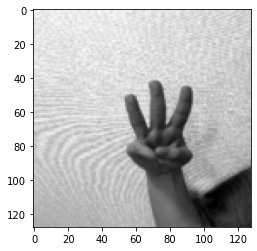

In [25]:
plt.imshow(immm[0][0],cmap='gray') # Display an example train image and label

In [52]:
laa[0]

tensor(2)

## Pretrained CNN

I will use pretrained CNN models to train dataset.

Viable options are:
1. Googlenet
2. Efficient Net
3. Resnet50

Each of them have distinct strengths and weaknesses.
After running each models for several time, it seems resnet returns the best results in terms of accuracy and overfitting prevention.

Composing my own CNN model is an another option, but using pretrained model seems more efficient option.

In [98]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet', pretrained=True)

Using cache found in C:\Users\icako/.cache\torch\hub\pytorch_vision_v0.10.0


In [71]:
model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_efficientnet_b0', pretrained=True)

Downloading: "https://github.com/NVIDIA/DeepLearningExamples/archive/torchhub.zip" to C:\Users\icako/.cache\torch\hub\torchhub.zip
C:\Users\icako/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub\PyTorch\Classification\ConvNets\image_classification\models\common.py:13: UserWarning: pytorch_quantization module not found, quantization will not be available
  warnings.warn(
C:\Users\icako/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub\PyTorch\Classification\ConvNets\image_classification\models\efficientnet.py:17: UserWarning: pytorch_quantization module not found, quantization will not be available
  warnings.warn(
Downloading: "https://api.ngc.nvidia.com/v2/models/nvidia/efficientnet_b0_pyt_amp/versions/20.12.0/files/nvidia_efficientnet-b0_210412.pth" to C:\Users\icako/.cache\torch\hub\checkpoints\nvidia_efficientnet-b0_210412.pth


  0%|          | 0.00/20.5M [00:00<?, ?B/s]

In [40]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True) #Download resnet 50

Using cache found in C:\Users\icako/.cache\torch\hub\pytorch_vision_v0.10.0
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\icako/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [99]:
model.fc = torch.nn.Linear(model.fc.in_features, 11,bias=True) 
# Change last linear layer of resnet so that it returns 11 outputs

In [100]:
model=model.to('cuda') #Use GPU when training model.
optimizer=torch.optim.Adam(params = model.parameters(), lr = CFG["LEARNING_RATE"]) 
# Use adam as optimizer and pretrained paramters
loss_func=torch.nn.CrossEntropyLoss() # Cross entropy as loss function
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer,
                                        lr_lambda=lambda epoch: 0.95 ** epoch,
                                        last_epoch=-1,
                                        verbose=False) #Use scheduler to change learning rate automatically.

In [101]:
train_loss_list=[]
train_acc_list=[]
val_loss_list=[]
val_acc_list=[]
best_acc=0

## Training and Validation

In [102]:
    for epoch in tqdm(range(1,CFG["EPOCHS"]+1)): #에포크 설정
        
        model.train()
        
        train_loss=0
        train_acc=0

        train_batch_len=0
        correct=0
        
        for img, label in tqdm(trainloader): #Training each batch of train set
            img,label=img.to('cuda'),label.to('cuda') #Use GPU when computing image and labels
            optimizer.zero_grad() # Reset gradients
            output=model.forward(img) # Forward pass
            loss = loss_func(output, label) # Compute loss 
            loss.backward() # Back propagation
            optimizer.step() # Optimize weights using ADAM
            train_loss+=loss.item() #Loss summation of each batch
            
            train_batch_len+=output.shape[0] 
            pred = output.argmax(dim=1, keepdim=True) # Predict label based on output of CNN model
            correct += pred.eq(label.view_as(pred)).sum().item() #Summation of total 'correctly' classified train data

        train_acc=100*correct/train_batch_len # Accuracy of each train batch
        train_loss=train_loss/len(trainloader) # Average loss of all batch
        
        train_loss_list.append(train_loss) # Record average train loss of all batch in each epoch
        train_acc_list.append(train_acc) # Record train accuracy of all batch in each epoch
        
        scheduler.step() # Change learning rate using scheduler

        model.eval() # Automatically modify model after each epoch

        correct=0
        val_batch_len=0
        val_loss=0
        vali_acc=0
        
        with torch.no_grad(): # Do no change gradient for validation set computation
            for img, label in tqdm(valloader): # Use each validation batch
                img, label = img.to('cuda'), label.to('cuda') #Use GPU when computing image and labels
                output = model.forward(img) # Forward pass
                val_loss += loss_func(output, label) # Compute loss 
                pred = output.argmax(dim=1, keepdim=True) # Predict label based on trained CNN model
                correct += pred.eq(label.view_as(pred)).sum().item()
                #Summation of total 'correctly' classified train data
                val_batch_len+=output.shape[0] 

        vali_acc = 100 * correct / val_batch_len # Accuracy of each validation batch
        val_loss=val_loss/len(valloader) # Average loss of all batch
        
        val_loss_list.append(val_loss) # Record average validation loss of all batch in each epoch
        val_acc_list.append(vali_acc) # Record validation accuracy of all batch in each epoch
        
        
        print('Train loss is: ',train_loss,'Validation Loss is :',val_loss)
        print('Train Accuracy is: ',round(train_acc,2),'Validation Accuracy is: ',round(vali_acc,2))
        print(epoch,'Completed')
        if best_acc < vali_acc:
            best_acc = vali_acc 
            print(best_acc)
            torch.save(model.state_dict(), 
                       'C:/Users/icako/user_data/saved/best_model.pth') 
            #Save model that returned highest validation accuracy
            print('Model Saved.')


  0%|          | 0/50 [00:00<?, ?it/s]C:\Users\icako\anaconda3\envs\Seung\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"

100%|██████████| 50/50 [00:04<00:00, 10.85it/s]

  4%|▍         | 1/25 [00:05<02:07,  5.33s/it]

Train loss is:  3.079026880264282 Validation Loss is : tensor(2.7498, device='cuda:0')
Train Accuracy is:  9.55 Validation Accuracy is:  8.04
1 Completed
8.041958041958042
Model Saved.



100%|██████████| 50/50 [00:04<00:00, 11.02it/s]

  8%|▊         | 2/25 [00:10<02:00,  5.26s/it]

Train loss is:  2.4922002029418944 Validation Loss is : tensor(2.5798, device='cuda:0')
Train Accuracy is:  10.46 Validation Accuracy is:  11.54
2 Completed
11.538461538461538
Model Saved.



100%|██████████| 50/50 [00:04<00:00, 11.08it/s]

 12%|█▏        | 3/25 [00:15<01:54,  5.20s/it]

Train loss is:  2.4032641458511352 Validation Loss is : tensor(2.4771, device='cuda:0')
Train Accuracy is:  9.5 Validation Accuracy is:  9.79
3 Completed



100%|██████████| 50/50 [00:04<00:00, 11.19it/s]

 16%|█▌        | 4/25 [00:20<01:48,  5.15s/it]

Train loss is:  2.357286591529846 Validation Loss is : tensor(2.3387, device='cuda:0')
Train Accuracy is:  11.56 Validation Accuracy is:  9.79
4 Completed



100%|██████████| 50/50 [00:04<00:00, 11.16it/s]

 20%|██        | 5/25 [00:25<01:42,  5.13s/it]

Train loss is:  2.3489238262176513 Validation Loss is : tensor(2.3288, device='cuda:0')
Train Accuracy is:  11.91 Validation Accuracy is:  9.09
5 Completed



100%|██████████| 50/50 [00:04<00:00, 11.11it/s]

 24%|██▍       | 6/25 [00:30<01:37,  5.13s/it]

Train loss is:  2.320252594947815 Validation Loss is : tensor(2.3170, device='cuda:0')
Train Accuracy is:  13.36 Validation Accuracy is:  10.61
6 Completed



100%|██████████| 50/50 [00:04<00:00, 10.84it/s]

 28%|██▊       | 7/25 [00:36<01:33,  5.17s/it]

Train loss is:  2.324283075332642 Validation Loss is : tensor(2.3003, device='cuda:0')
Train Accuracy is:  12.66 Validation Accuracy is:  11.89
7 Completed
11.888111888111888
Model Saved.



100%|██████████| 50/50 [00:04<00:00, 11.06it/s]

 32%|███▏      | 8/25 [00:41<01:27,  5.16s/it]

Train loss is:  2.3129597997665403 Validation Loss is : tensor(2.5815, device='cuda:0')
Train Accuracy is:  13.46 Validation Accuracy is:  11.07
8 Completed



100%|██████████| 50/50 [00:04<00:00, 11.05it/s]

 36%|███▌      | 9/25 [00:46<01:22,  5.17s/it]

Train loss is:  2.317258243560791 Validation Loss is : tensor(2.2833, device='cuda:0')
Train Accuracy is:  13.56 Validation Accuracy is:  13.75
9 Completed
13.752913752913752
Model Saved.



100%|██████████| 50/50 [00:04<00:00, 10.50it/s]

 40%|████      | 10/25 [00:51<01:18,  5.24s/it]

Train loss is:  2.241845417022705 Validation Loss is : tensor(2.3412, device='cuda:0')
Train Accuracy is:  17.01 Validation Accuracy is:  13.75
10 Completed



100%|██████████| 50/50 [00:04<00:00, 11.01it/s]

 44%|████▍     | 11/25 [00:57<01:13,  5.23s/it]

Train loss is:  2.151835777759552 Validation Loss is : tensor(2.8242, device='cuda:0')
Train Accuracy is:  18.66 Validation Accuracy is:  12.94
11 Completed



100%|██████████| 50/50 [00:04<00:00, 10.14it/s]

 48%|████▊     | 12/25 [01:02<01:09,  5.35s/it]

Train loss is:  2.0755811953544616 Validation Loss is : tensor(2.1649, device='cuda:0')
Train Accuracy is:  20.26 Validation Accuracy is:  15.38
12 Completed
15.384615384615385
Model Saved.



100%|██████████| 50/50 [00:04<00:00, 10.67it/s]

 52%|█████▏    | 13/25 [01:08<01:04,  5.36s/it]

Train loss is:  2.000754990577698 Validation Loss is : tensor(1.9339, device='cuda:0')
Train Accuracy is:  20.51 Validation Accuracy is:  21.21
13 Completed
21.21212121212121
Model Saved.



100%|██████████| 50/50 [00:04<00:00, 10.29it/s]

 56%|█████▌    | 14/25 [01:13<00:59,  5.42s/it]

Train loss is:  1.9134333872795104 Validation Loss is : tensor(2.1142, device='cuda:0')
Train Accuracy is:  24.21 Validation Accuracy is:  22.03
14 Completed
22.027972027972027
Model Saved.



100%|██████████| 50/50 [00:04<00:00, 10.97it/s]

 60%|██████    | 15/25 [01:18<00:53,  5.37s/it]

Train loss is:  1.7512229871749878 Validation Loss is : tensor(1.7435, device='cuda:0')
Train Accuracy is:  27.11 Validation Accuracy is:  27.97
15 Completed
27.972027972027973
Model Saved.



100%|██████████| 50/50 [00:04<00:00, 10.96it/s]

 64%|██████▍   | 16/25 [01:24<00:47,  5.32s/it]

Train loss is:  1.5748800921440125 Validation Loss is : tensor(1.7259, device='cuda:0')
Train Accuracy is:  32.02 Validation Accuracy is:  31.35
16 Completed
31.35198135198135
Model Saved.



100%|██████████| 50/50 [00:04<00:00, 10.96it/s]

 68%|██████▊   | 17/25 [01:29<00:42,  5.30s/it]

Train loss is:  1.5316225957870484 Validation Loss is : tensor(1.9834, device='cuda:0')
Train Accuracy is:  36.47 Validation Accuracy is:  34.62
17 Completed
34.61538461538461
Model Saved.



100%|██████████| 50/50 [00:04<00:00, 10.55it/s]

 72%|███████▏  | 18/25 [01:34<00:37,  5.35s/it]

Train loss is:  1.3735135340690612 Validation Loss is : tensor(1.8836, device='cuda:0')
Train Accuracy is:  43.92 Validation Accuracy is:  38.23
18 Completed
38.22843822843823
Model Saved.



100%|██████████| 50/50 [00:04<00:00, 10.48it/s]

 76%|███████▌  | 19/25 [01:40<00:32,  5.38s/it]

Train loss is:  1.1988812053203584 Validation Loss is : tensor(1.5956, device='cuda:0')
Train Accuracy is:  52.38 Validation Accuracy is:  48.83
19 Completed
48.83449883449884
Model Saved.



100%|██████████| 50/50 [00:04<00:00, 10.26it/s]

 80%|████████  | 20/25 [01:45<00:27,  5.44s/it]

Train loss is:  1.0751996147632599 Validation Loss is : tensor(1.4248, device='cuda:0')
Train Accuracy is:  57.58 Validation Accuracy is:  54.78
20 Completed
54.77855477855478
Model Saved.



100%|██████████| 50/50 [00:04<00:00, 11.08it/s]

 84%|████████▍ | 21/25 [01:51<00:21,  5.35s/it]

Train loss is:  1.0056319010257722 Validation Loss is : tensor(1.2003, device='cuda:0')
Train Accuracy is:  60.78 Validation Accuracy is:  52.68
21 Completed



100%|██████████| 50/50 [00:04<00:00, 11.02it/s]

 88%|████████▊ | 22/25 [01:56<00:15,  5.30s/it]

Train loss is:  0.8552205801010132 Validation Loss is : tensor(0.9982, device='cuda:0')
Train Accuracy is:  67.03 Validation Accuracy is:  63.99
22 Completed
63.98601398601399
Model Saved.



100%|██████████| 50/50 [00:04<00:00, 11.02it/s]

 92%|█████████▏| 23/25 [02:01<00:10,  5.26s/it]

Train loss is:  0.7648937821388244 Validation Loss is : tensor(1.7826, device='cuda:0')
Train Accuracy is:  70.49 Validation Accuracy is:  45.45
23 Completed



100%|██████████| 50/50 [00:04<00:00, 11.06it/s]

 96%|█████████▌| 24/25 [02:06<00:05,  5.23s/it]

Train loss is:  0.6340599018335342 Validation Loss is : tensor(0.6168, device='cuda:0')
Train Accuracy is:  76.24 Validation Accuracy is:  78.32
24 Completed
78.32167832167832
Model Saved.



100%|██████████| 50/50 [00:04<00:00, 11.02it/s]

100%|██████████| 25/25 [02:11<00:00,  5.27s/it]

Train loss is:  0.572795267701149 Validation Loss is : tensor(1.2689, device='cuda:0')
Train Accuracy is:  79.14 Validation Accuracy is:  62.47
25 Completed


## Summary of trained ResNet50 model

As expected, extent of overfitting increased as number of epochs increased.
Each train and validation accuracy curve reached plateau after 20th epochs.
Training accuracy was very stable and remained at high level after 15th epochs.
Validation accuracy was very volatile. 

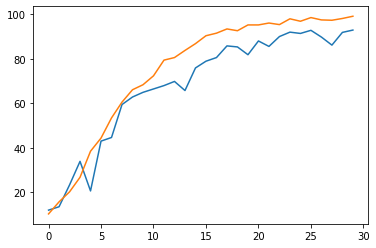

In [72]:
plt.plot(val_acc_list)
plt.plot(train_acc_list)

In [80]:
val_loss_list=[x.item() for x in val_loss_list]

(0.0, 5.0)

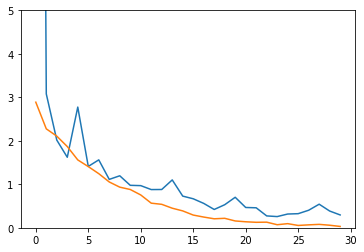

In [88]:
plt.plot(val_loss_list)
plt.plot(train_loss_list)
plt.ylim(0,5)
# Train loss steadily decreased while validation loss fluctuated a lot.

In [58]:
checkpoint=torch.load('C:/Users/icako/user_data/saved/best_model.pth') # Load the best model
model.load_state_dict(checkpoint) 

<All keys matched successfully>

In [59]:
test=torch.zeros((len(test_img_path[0]),3,128,128))
for j,path in enumerate(test_img_path[0]):
    test[j]=transformer(cv2.imread(path))
test_loader = DataLoader(test, batch_size = CFG['BATCH_SIZE'], shuffle=False, num_workers=0)
# Transform test dataset

In [60]:
model.eval()
model_pred = []
with torch.no_grad():
    for img in tqdm(test_loader):
        img = img.to('cuda')
        pred_logit = model(img)
        pred_logit = pred_logit.argmax(dim=1, keepdim=True).squeeze(1) # Predict test images
        model_pred.extend(pred_logit.tolist())


100%|██████████| 18/18 [00:00<00:00, 27.68it/s]


In [61]:
submission = pd.read_csv('./user_data/sample_submission.csv')
submission['label'] = model_pred

In [62]:
submission.head(5)

,file_name,label
0,001.png,1
1,002.png,1
2,003.png,1
3,004.png,6
4,005.png,7
...,...,...
210,211.png,5
211,212.png,8
212,213.png,2
213,214.png,6


In [63]:
submission['label'][submission['label'] == 10] = '10-1' ## label : 10 -> '10-1'
submission['label'][submission['label'] == 0] = '10-2' ## Label : 0 -> '10-2'
submission['label'] = submission['label'].apply(lambda x : str(x)) ## Dtype : int -> object

C:\Users\icako\AppData\Local\Temp/ipykernel_22172/3411836075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['label'][submission['label'] == 10] = '10-1' ## label : 10 -> '10-1'


In [64]:
submission.to_csv('submit.csv', index=False)

Test accuracy was 85%.
It is asserted that at least 95% accuracy be returned for CNN model to be considered "adequate"
I expect that an expansion of input dimension via various data augmentation techniques will definitely increase accuracy.